In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('TATAMOTORS.csv')
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-2024,EQ,982.50,999.90,979.00,978.65,995.00,992.80,989.41,"1,065.60",400.45,"98,62,996","9,75,85,05,417.60","2,06,461"
1,27-Mar-2024,EQ,991.60,995.00,976.70,986.20,979.85,978.65,986.05,"1,065.60",400.45,"66,40,537","6,54,79,01,957.20","1,53,746"
2,26-Mar-2024,EQ,977.00,995.00,976.00,979.80,987.15,986.20,988.47,"1,065.60",400.45,"94,61,531","9,35,24,25,727.35","2,03,693"
3,22-Mar-2024,EQ,964.90,986.20,950.35,964.90,979.75,979.80,973.11,"1,065.60",400.45,"1,36,38,296","13,27,15,35,879.30","3,31,701"
4,21-Mar-2024,EQ,951.00,969.25,946.00,940.45,965.55,964.90,959.70,"1,065.60",400.45,"1,10,74,207","10,62,78,71,292.80","2,55,104"


In [3]:
df=df.iloc[::-1].reset_index(drop=True)

In [4]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,03-Apr-2023,EQ,423.00,424.95,419.50,420.80,424.25,424.25,422.32,494.40,366.2,"69,48,329","2,93,44,37,512.10","87,550"
1,05-Apr-2023,EQ,424.25,428.75,423.15,424.25,426.20,426.55,426.05,494.40,366.2,"88,21,326","3,75,83,64,940.45","90,806"
2,06-Apr-2023,EQ,426.50,439.30,423.75,426.55,437.15,437.65,433.76,494.40,366.2,"1,09,07,492","4,73,12,08,323.35","1,18,995"
3,10-Apr-2023,EQ,452.05,473.30,452.00,437.65,460.90,461.30,465.71,494.40,366.2,"5,04,62,653","23,50,09,60,587.70","5,10,047"
4,11-Apr-2023,EQ,463.75,463.75,455.80,461.30,459.40,458.70,459.17,494.40,366.2,"1,44,95,222","6,65,57,22,381.60","2,81,916"


In [5]:
#df=df.drop(['Date '], axis=1)
df=df.drop(['series '], axis=1)
df=df.drop(['PREV. CLOSE '], axis=1)
df=df.drop(['ltp '], axis=1)
df=df.drop(['vwap '], axis=1)
df=df.drop(['VALUE '], axis=1)
df=df.drop(['No of trades '], axis=1)

In [6]:
df['Date '] = pd.to_datetime(df['Date '])
df.set_index('Date ', inplace=True)
df.head()

,OPEN,HIGH,LOW,close,52W H,52W L,VOLUME
Date,,,,,,,
2023-04-03,423.00,424.95,419.50,424.25,494.40,366.2,"69,48,329"
2023-04-05,424.25,428.75,423.15,426.55,494.40,366.2,"88,21,326"
2023-04-06,426.50,439.30,423.75,437.65,494.40,366.2,"1,09,07,492"
2023-04-10,452.05,473.30,452.00,461.30,494.40,366.2,"5,04,62,653"
2023-04-11,463.75,463.75,455.80,458.70,494.40,366.2,"1,44,95,222"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2023-04-03 to 2024-03-28
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OPEN     246 non-null    object 
 1   HIGH     246 non-null    object 
 2   LOW      246 non-null    object 
 3   close    246 non-null    object 
 4   52W H    246 non-null    object 
 5   52W L    246 non-null    float64
 6   VOLUME   246 non-null    object 
dtypes: float64(1), object(6)
memory usage: 15.4+ KB


In [8]:
def convert(dat):
    d=dat.replace(",","")
    d=float(d)
    return d

In [9]:
def convert_int(dat):
    d=dat.replace(",","")
    d=int(d)
    return d

In [11]:
# df['OPEN '] = df['OPEN '].apply(convert)
# df['HIGH '] = df['HIGH '].apply(convert)
# df['LOW '] = df['LOW '].apply(convert)
# df['close '] = df['close '].apply(convert)
# df['52W H '] = df['52W H '].apply(convert)
# df['52W L '] = df['52W L '].apply(convert)
df['VOLUME '] = df['VOLUME '].apply(convert_int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2023-04-03 to 2024-03-28
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OPEN     246 non-null    float64
 1   HIGH     246 non-null    float64
 2   LOW      246 non-null    float64
 3   close    246 non-null    float64
 4   52W H    246 non-null    float64
 5   52W L    246 non-null    float64
 6   VOLUME   246 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 15.4 KB


In [13]:
df.describe()

,OPEN,HIGH,LOW,close,52W H,52W L,VOLUME
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,2.460000e+02
mean,680.823577,687.822154,673.017683,680.280081,706.862805,379.894715,1.166295e+07
std,150.746858,152.839910,148.063713,150.190779,156.229245,11.135604,7.340231e+06
min,423.000000,424.950000,419.500000,424.250000,494.400000,366.200000,1.783565e+06
25%,592.600000,599.825000,588.787500,592.475000,602.300000,375.200000,7.585377e+06
50%,634.825000,639.600000,627.225000,632.275000,665.400000,375.200000,9.979192e+06
75%,777.500000,796.525000,770.687500,781.075000,802.900000,379.550000,1.282554e+07
max,1034.750000,1065.600000,1021.000000,1039.300000,1065.600000,400.450000,5.981103e+07


In [14]:
df.isnull().sum()

OPEN       0
HIGH       0
LOW        0
close      0
52W H      0
52W L      0
VOLUME     0
dtype: int64

In [15]:
df['Next_Day_Close'] = df['close '].shift(-1)

In [16]:
df.tail()

,OPEN,HIGH,LOW,close,52W H,52W L,VOLUME,Next_Day_Close
Date,,,,,,,,
2024-03-21,951.0,969.25,946.00,964.90,1065.6,400.45,11074207,979.80
2024-03-22,964.9,986.20,950.35,979.80,1065.6,400.45,13638296,986.20
2024-03-26,977.0,995.00,976.00,986.20,1065.6,400.45,9461531,978.65
2024-03-27,991.6,995.00,976.70,978.65,1065.6,400.45,6640537,992.80
2024-03-28,982.5,999.90,979.00,992.80,1065.6,400.45,9862996,NaN


In [17]:
df.shape

(246, 8)

In [18]:
#df.drop([df.shape[0]-1], axis=0, inplace=True)
df = df.drop(index="2024-03-28")

In [19]:
df.tail()

,OPEN,HIGH,LOW,close,52W H,52W L,VOLUME,Next_Day_Close
Date,,,,,,,,
2024-03-20,960.9,965.15,921.20,940.45,1065.6,400.45,13900321,964.90
2024-03-21,951.0,969.25,946.00,964.90,1065.6,400.45,11074207,979.80
2024-03-22,964.9,986.20,950.35,979.80,1065.6,400.45,13638296,986.20
2024-03-26,977.0,995.00,976.00,986.20,1065.6,400.45,9461531,978.65
2024-03-27,991.6,995.00,976.70,978.65,1065.6,400.45,6640537,992.80


In [20]:
train_data=df[0:int(len(df) * 0.8)]
test_data=df[int(len(df) * 0.8):]
train_ar = train_data['Next_Day_Close'].values
test_ar = test_data['Next_Day_Close'].values

In [21]:
X_train=train_data.drop(['Next_Day_Close'], axis=1)
X_test=test_data.drop(['Next_Day_Close'], axis=1)


In [22]:
X_train=np.expand_dims(X_train,axis=1)

In [23]:
X_test=np.expand_dims(X_test,axis=1)

In [24]:
y_train=train_data['Next_Day_Close']
y_test=test_data['Next_Day_Close']

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [26]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (1,X_train.shape[2],)))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(1,activation="linear"))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             11600     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31,851
Trainable params: 31,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
filepath = 'model_rel.keras'
checkpoint = ModelCheckpoint(filepath=filepath,monitor='loss',verbose=1,save_best_only=True,mode='min')
ES = EarlyStopping(monitor='loss', patience=100)

In [28]:
history=model.fit(X_train, y_train, epochs=10000,validation_data=[X_test,y_test], callbacks = [checkpoint,ES])

Epoch 1/10000
1/7 [===>..........................] - ETA: 17s - loss: 423903.2812 - mean_absolute_error: 646.8439
Epoch 1: loss improved from inf to 390063.34375, saving model to model_rel.keras
7/7 [==============================] - 4s 129ms/step - loss: 390063.3438 - mean_absolute_error: 618.6342 - val_loss: 871434.7500 - val_mean_absolute_error: 931.5523
Epoch 2/10000
1/7 [===>..........................] - ETA: 0s - loss: 396619.9375 - mean_absolute_error: 625.2494
Epoch 2: loss improved from 390063.34375 to 389870.09375, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 389870.0938 - mean_absolute_error: 618.4783 - val_loss: 871143.3750 - val_mean_absolute_error: 931.3958
Epoch 3/10000
1/7 [===>..........................] - ETA: 0s - loss: 388886.3750 - mean_absolute_error: 618.6729
Epoch 3: loss improved from 389870.09375 to 389677.68750, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 389677.687

1/7 [===>..........................] - ETA: 0s - loss: 394491.7188 - mean_absolute_error: 623.1062
Epoch 23: loss improved from 379150.84375 to 378372.12500, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 378372.1250 - mean_absolute_error: 609.1313 - val_loss: 853202.4375 - val_mean_absolute_error: 921.7143
Epoch 24/10000
1/7 [===>..........................] - ETA: 0s - loss: 388022.2500 - mean_absolute_error: 614.2558
Epoch 24: loss improved from 378372.12500 to 377647.68750, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 377647.6875 - mean_absolute_error: 608.5097 - val_loss: 852106.1250 - val_mean_absolute_error: 921.1194
Epoch 25/10000
1/7 [===>..........................] - ETA: 0s - loss: 370106.3125 - mean_absolute_error: 602.6783
Epoch 25: loss improved from 377647.68750 to 376958.15625, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 376958.1562 

1/7 [===>..........................] - ETA: 0s - loss: 375687.3125 - mean_absolute_error: 605.7983
Epoch 45: loss improved from 365752.25000 to 365288.93750, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 365288.9375 - mean_absolute_error: 598.2741 - val_loss: 833290.7500 - val_mean_absolute_error: 910.8488
Epoch 46/10000
1/7 [===>..........................] - ETA: 0s - loss: 380048.5625 - mean_absolute_error: 610.5143
Epoch 46: loss improved from 365288.93750 to 364764.75000, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 364764.7500 - mean_absolute_error: 597.8359 - val_loss: 832532.8750 - val_mean_absolute_error: 910.4326
Epoch 47/10000
1/7 [===>..........................] - ETA: 0s - loss: 370956.6562 - mean_absolute_error: 604.1479
Epoch 47: loss improved from 364764.75000 to 364208.15625, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 364208.1562 

1/7 [===>..........................] - ETA: 0s - loss: 333856.8438 - mean_absolute_error: 573.9352
Epoch 67: loss improved from 355683.06250 to 355211.37500, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 355211.3750 - mean_absolute_error: 589.8011 - val_loss: 818205.0625 - val_mean_absolute_error: 902.5297
Epoch 68/10000
1/7 [===>..........................] - ETA: 0s - loss: 320847.6875 - mean_absolute_error: 558.8748
Epoch 68: loss improved from 355211.37500 to 354813.56250, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 354813.5625 - mean_absolute_error: 589.4644 - val_loss: 817573.0625 - val_mean_absolute_error: 902.1794
Epoch 69/10000
1/7 [===>..........................] - ETA: 0s - loss: 386058.3125 - mean_absolute_error: 615.1792
Epoch 69: loss improved from 354813.56250 to 354397.21875, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 354397.2188 

1/7 [===>..........................] - ETA: 0s - loss: 349830.4062 - mean_absolute_error: 586.0237
Epoch 89: loss improved from 346939.87500 to 346633.03125, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 346633.0312 - mean_absolute_error: 582.4811 - val_loss: 805003.5625 - val_mean_absolute_error: 895.1862
Epoch 90/10000
1/7 [===>..........................] - ETA: 0s - loss: 339200.3750 - mean_absolute_error: 577.8787
Epoch 90: loss improved from 346633.03125 to 346186.12500, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 346186.1250 - mean_absolute_error: 582.0928 - val_loss: 804431.1250 - val_mean_absolute_error: 894.8664
Epoch 91/10000
1/7 [===>..........................] - ETA: 0s - loss: 368299.9062 - mean_absolute_error: 599.9794
Epoch 91: loss improved from 346186.12500 to 345815.96875, saving model to model_rel.keras
7/7 [==============================] - 0s 13ms/step - loss: 345815.9688 

1/7 [===>..........................] - ETA: 0s - loss: 363232.2812 - mean_absolute_error: 598.5249
Epoch 111: loss improved from 339043.37500 to 338683.84375, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 338683.8438 - mean_absolute_error: 575.6118 - val_loss: 792817.5000 - val_mean_absolute_error: 888.3536
Epoch 112/10000
1/7 [===>..........................] - ETA: 0s - loss: 348341.4688 - mean_absolute_error: 584.9701
Epoch 112: loss improved from 338683.84375 to 338295.53125, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 338295.5312 - mean_absolute_error: 575.2780 - val_loss: 792282.7500 - val_mean_absolute_error: 888.0526
Epoch 113/10000
1/7 [===>..........................] - ETA: 0s - loss: 357746.1875 - mean_absolute_error: 592.6575
Epoch 113: loss improved from 338295.53125 to 337987.56250, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 337987.

1/7 [===>..........................] - ETA: 0s - loss: 350636.5625 - mean_absolute_error: 583.9996
Epoch 133: loss improved from 331504.56250 to 331180.03125, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 331180.0312 - mean_absolute_error: 569.0569 - val_loss: 781235.7500 - val_mean_absolute_error: 881.8109
Epoch 134/10000
1/7 [===>..........................] - ETA: 0s - loss: 312927.8125 - mean_absolute_error: 553.6549
Epoch 134: loss improved from 331180.03125 to 330834.06250, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 330834.0625 - mean_absolute_error: 568.7565 - val_loss: 780723.1250 - val_mean_absolute_error: 881.5201
Epoch 135/10000
1/7 [===>..........................] - ETA: 0s - loss: 328661.5625 - mean_absolute_error: 567.7394
Epoch 135: loss improved from 330834.06250 to 330470.37500, saving model to model_rel.keras
7/7 [==============================] - 0s 13ms/step - loss: 330470.

1/7 [===>..........................] - ETA: 0s - loss: 350904.6875 - mean_absolute_error: 585.3275
Epoch 155: loss improved from 324237.18750 to 323978.28125, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 323978.2812 - mean_absolute_error: 562.6908 - val_loss: 770037.3125 - val_mean_absolute_error: 875.4382
Epoch 156/10000
1/7 [===>..........................] - ETA: 0s - loss: 315861.5000 - mean_absolute_error: 556.7266
Epoch 156: loss improved from 323978.28125 to 323627.37500, saving model to model_rel.keras
7/7 [==============================] - 0s 15ms/step - loss: 323627.3750 - mean_absolute_error: 562.3800 - val_loss: 769537.5000 - val_mean_absolute_error: 875.1528
Epoch 157/10000
1/7 [===>..........................] - ETA: 0s - loss: 323703.2500 - mean_absolute_error: 563.3456
Epoch 157: loss improved from 323627.37500 to 323318.28125, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 323318.

1/7 [===>..........................] - ETA: 0s - loss: 299432.2188 - mean_absolute_error: 542.6650
Epoch 177: loss improved from 317276.37500 to 316936.87500, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 316936.8750 - mean_absolute_error: 556.4050 - val_loss: 759163.3750 - val_mean_absolute_error: 869.2054
Epoch 178/10000
1/7 [===>..........................] - ETA: 0s - loss: 342412.5625 - mean_absolute_error: 578.0317
Epoch 178: loss improved from 316936.87500 to 316641.31250, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 316641.3125 - mean_absolute_error: 556.1362 - val_loss: 758674.1250 - val_mean_absolute_error: 868.9240
Epoch 179/10000
1/7 [===>..........................] - ETA: 0s - loss: 325890.7500 - mean_absolute_error: 562.3862
Epoch 179: loss improved from 316641.31250 to 316333.71875, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 316333.

1/7 [===>..........................] - ETA: 0s - loss: 354327.6250 - mean_absolute_error: 587.2296
Epoch 199: loss improved from 310434.90625 to 310122.53125, saving model to model_rel.keras
7/7 [==============================] - 0s 15ms/step - loss: 310122.5312 - mean_absolute_error: 550.2472 - val_loss: 748484.2500 - val_mean_absolute_error: 863.0405
Epoch 200/10000
1/7 [===>..........................] - ETA: 0s - loss: 321648.2500 - mean_absolute_error: 561.6532
Epoch 200: loss improved from 310122.53125 to 309805.81250, saving model to model_rel.keras
7/7 [==============================] - 0s 8ms/step - loss: 309805.8125 - mean_absolute_error: 549.9510 - val_loss: 748004.0625 - val_mean_absolute_error: 862.7623
Epoch 201/10000
1/7 [===>..........................] - ETA: 0s - loss: 298520.4375 - mean_absolute_error: 541.2902
Epoch 201: loss improved from 309805.81250 to 309523.50000, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 309523.5

1/7 [===>..........................] - ETA: 0s - loss: 317696.8125 - mean_absolute_error: 558.9263
Epoch 221: loss improved from 303810.25000 to 303510.75000, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 303510.7500 - mean_absolute_error: 544.2004 - val_loss: 738085.5000 - val_mean_absolute_error: 856.9949
Epoch 222/10000
1/7 [===>..........................] - ETA: 0s - loss: 287356.2500 - mean_absolute_error: 530.7252
Epoch 222: loss improved from 303510.75000 to 303212.78125, saving model to model_rel.keras
7/7 [==============================] - 0s 13ms/step - loss: 303212.7812 - mean_absolute_error: 543.9297 - val_loss: 737620.7500 - val_mean_absolute_error: 856.7236
Epoch 223/10000
1/7 [===>..........................] - ETA: 0s - loss: 287437.4375 - mean_absolute_error: 532.0277
Epoch 223: loss improved from 303212.78125 to 302923.62500, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 302923.

1/7 [===>..........................] - ETA: 0s - loss: 284994.3125 - mean_absolute_error: 526.1848
Epoch 243: loss improved from 297335.37500 to 297048.34375, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 297048.3438 - mean_absolute_error: 538.2304 - val_loss: 727879.6875 - val_mean_absolute_error: 851.0197
Epoch 244/10000
1/7 [===>..........................] - ETA: 0s - loss: 285176.6562 - mean_absolute_error: 526.9123
Epoch 244: loss improved from 297048.34375 to 296743.34375, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 296743.3438 - mean_absolute_error: 537.9448 - val_loss: 727420.1875 - val_mean_absolute_error: 850.7497
Epoch 245/10000
1/7 [===>..........................] - ETA: 0s - loss: 303634.7500 - mean_absolute_error: 545.7197
Epoch 245: loss improved from 296743.34375 to 296435.90625, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 296435.

1/7 [===>..........................] - ETA: 0s - loss: 267960.6562 - mean_absolute_error: 508.7946
Epoch 265: loss improved from 290962.03125 to 290657.68750, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 290657.6875 - mean_absolute_error: 532.2624 - val_loss: 717796.3125 - val_mean_absolute_error: 845.0746
Epoch 266/10000
1/7 [===>..........................] - ETA: 0s - loss: 280269.3125 - mean_absolute_error: 522.3521
Epoch 266: loss improved from 290657.68750 to 290363.56250, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 290363.5625 - mean_absolute_error: 531.9865 - val_loss: 717344.0000 - val_mean_absolute_error: 844.8069
Epoch 267/10000
1/7 [===>..........................] - ETA: 0s - loss: 282771.5312 - mean_absolute_error: 525.3715
Epoch 267: loss improved from 290363.56250 to 290081.68750, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 290081.

1/7 [===>..........................] - ETA: 0s - loss: 283474.8750 - mean_absolute_error: 524.9387
Epoch 287: loss improved from 284703.96875 to 284412.84375, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 284412.8438 - mean_absolute_error: 526.3656 - val_loss: 707865.0000 - val_mean_absolute_error: 839.1780
Epoch 288/10000
1/7 [===>..........................] - ETA: 0s - loss: 287467.6250 - mean_absolute_error: 529.3884
Epoch 288: loss improved from 284412.84375 to 284132.62500, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 284132.6250 - mean_absolute_error: 526.0967 - val_loss: 707418.1250 - val_mean_absolute_error: 838.9116
Epoch 289/10000
1/7 [===>..........................] - ETA: 0s - loss: 253972.6406 - mean_absolute_error: 495.8506
Epoch 289: loss improved from 284132.62500 to 283856.62500, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 283856.

1/7 [===>..........................] - ETA: 0s - loss: 265560.3750 - mean_absolute_error: 507.8100
Epoch 309: loss improved from 278562.43750 to 278279.56250, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 278279.5625 - mean_absolute_error: 520.5032 - val_loss: 698065.8125 - val_mean_absolute_error: 833.3190
Epoch 310/10000
1/7 [===>..........................] - ETA: 0s - loss: 300614.2188 - mean_absolute_error: 538.9772
Epoch 310: loss improved from 278279.56250 to 277993.03125, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 277993.0312 - mean_absolute_error: 520.2297 - val_loss: 697628.2500 - val_mean_absolute_error: 833.0565
Epoch 311/10000
1/7 [===>..........................] - ETA: 0s - loss: 297445.0625 - mean_absolute_error: 540.1274
Epoch 311: loss improved from 277993.03125 to 277730.68750, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 277730.

1/7 [===>..........................] - ETA: 0s - loss: 288157.2188 - mean_absolute_error: 530.4274
Epoch 331: loss improved from 272529.18750 to 272250.90625, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 272250.9062 - mean_absolute_error: 514.6805 - val_loss: 688389.1250 - val_mean_absolute_error: 827.4926
Epoch 332/10000
1/7 [===>..........................] - ETA: 0s - loss: 286838.5000 - mean_absolute_error: 525.4213
Epoch 332: loss improved from 272250.90625 to 271975.84375, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 271975.8438 - mean_absolute_error: 514.4164 - val_loss: 687949.9375 - val_mean_absolute_error: 827.2271
Epoch 333/10000
1/7 [===>..........................] - ETA: 0s - loss: 264774.1562 - mean_absolute_error: 507.6261
Epoch 333: loss improved from 271975.84375 to 271710.40625, saving model to model_rel.keras
7/7 [==============================] - 0s 8ms/step - loss: 271710.4

1/7 [===>..........................] - ETA: 0s - loss: 292642.1250 - mean_absolute_error: 534.5417
Epoch 353: loss improved from 266570.34375 to 266305.84375, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 266305.8438 - mean_absolute_error: 508.8694 - val_loss: 678830.5625 - val_mean_absolute_error: 821.6966
Epoch 354/10000
1/7 [===>..........................] - ETA: 0s - loss: 285582.2500 - mean_absolute_error: 528.6778
Epoch 354: loss improved from 266305.84375 to 266042.12500, saving model to model_rel.keras
7/7 [==============================] - 0s 19ms/step - loss: 266042.1250 - mean_absolute_error: 508.6148 - val_loss: 678402.6250 - val_mean_absolute_error: 821.4362
Epoch 355/10000
1/7 [===>..........................] - ETA: 0s - loss: 270329.5625 - mean_absolute_error: 511.7181
Epoch 355: loss improved from 266042.12500 to 265766.81250, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 265766.

1/7 [===>..........................] - ETA: 0s - loss: 257214.4375 - mean_absolute_error: 500.1367
Epoch 375: loss improved from 260721.10938 to 260463.71875, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 260463.7188 - mean_absolute_error: 503.1000 - val_loss: 669375.7500 - val_mean_absolute_error: 815.9231
Epoch 376/10000
1/7 [===>..........................] - ETA: 0s - loss: 268597.3750 - mean_absolute_error: 511.1003
Epoch 376: loss improved from 260463.71875 to 260198.32812, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 260198.3281 - mean_absolute_error: 502.8357 - val_loss: 668947.8125 - val_mean_absolute_error: 815.6608
Epoch 377/10000
1/7 [===>..........................] - ETA: 0s - loss: 281156.6875 - mean_absolute_error: 526.0205
Epoch 377: loss improved from 260198.32812 to 259942.75000, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 259942.

1/7 [===>..........................] - ETA: 0s - loss: 231578.8750 - mean_absolute_error: 471.8100
Epoch 397: loss improved from 254966.14062 to 254727.51562, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 254727.5156 - mean_absolute_error: 497.3682 - val_loss: 660029.6875 - val_mean_absolute_error: 810.1755
Epoch 398/10000
1/7 [===>..........................] - ETA: 0s - loss: 244242.6875 - mean_absolute_error: 487.9901
Epoch 398: loss improved from 254727.51562 to 254456.20312, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 254456.2031 - mean_absolute_error: 497.0951 - val_loss: 659606.3750 - val_mean_absolute_error: 809.9142
Epoch 399/10000
1/7 [===>..........................] - ETA: 0s - loss: 256501.7656 - mean_absolute_error: 495.3091
Epoch 399: loss improved from 254456.20312 to 254184.78125, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 254184.

1/7 [===>..........................] - ETA: 0s - loss: 244487.2812 - mean_absolute_error: 488.3596
Epoch 419: loss improved from 249314.20312 to 249081.20312, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 249081.2031 - mean_absolute_error: 491.6574 - val_loss: 650793.1250 - val_mean_absolute_error: 804.4550
Epoch 420/10000
1/7 [===>..........................] - ETA: 0s - loss: 255220.6562 - mean_absolute_error: 496.0870
Epoch 420: loss improved from 249081.20312 to 248797.37500, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 248797.3750 - mean_absolute_error: 491.3687 - val_loss: 650375.0000 - val_mean_absolute_error: 804.1951
Epoch 421/10000
1/7 [===>..........................] - ETA: 0s - loss: 230871.2188 - mean_absolute_error: 472.6049
Epoch 421: loss improved from 248797.37500 to 248536.14062, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 248536.

1/7 [===>..........................] - ETA: 0s - loss: 252482.5625 - mean_absolute_error: 496.8818
Epoch 441: loss improved from 243744.18750 to 243484.15625, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 243484.1562 - mean_absolute_error: 485.9320 - val_loss: 641675.3750 - val_mean_absolute_error: 798.7679
Epoch 442/10000
1/7 [===>..........................] - ETA: 0s - loss: 244838.3750 - mean_absolute_error: 490.0430
Epoch 442: loss improved from 243484.15625 to 243233.53125, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 243233.5312 - mean_absolute_error: 485.6747 - val_loss: 641264.8750 - val_mean_absolute_error: 798.5109
Epoch 443/10000
1/7 [===>..........................] - ETA: 0s - loss: 263821.5000 - mean_absolute_error: 503.7160
Epoch 443: loss improved from 243233.53125 to 242992.18750, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 242992.

1/7 [===>..........................] - ETA: 0s - loss: 225294.0000 - mean_absolute_error: 466.2473
Epoch 463: loss improved from 238242.89062 to 237999.42188, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 237999.4219 - mean_absolute_error: 480.2567 - val_loss: 632636.6875 - val_mean_absolute_error: 793.0898
Epoch 464/10000
1/7 [===>..........................] - ETA: 0s - loss: 232780.4062 - mean_absolute_error: 473.8332
Epoch 464: loss improved from 237999.42188 to 237750.67188, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 237750.6719 - mean_absolute_error: 479.9967 - val_loss: 632228.1875 - val_mean_absolute_error: 792.8322
Epoch 465/10000
1/7 [===>..........................] - ETA: 0s - loss: 232919.5000 - mean_absolute_error: 474.8101
Epoch 465: loss improved from 237750.67188 to 237509.42188, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 237509.

1/7 [===>..........................] - ETA: 0s - loss: 223597.9531 - mean_absolute_error: 465.6064
Epoch 485: loss improved from 232823.65625 to 232566.34375, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 232566.3438 - mean_absolute_error: 474.5670 - val_loss: 623654.3125 - val_mean_absolute_error: 787.4066
Epoch 486/10000
1/7 [===>..........................] - ETA: 0s - loss: 219756.1562 - mean_absolute_error: 462.5369
Epoch 486: loss improved from 232566.34375 to 232336.59375, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 232336.5938 - mean_absolute_error: 474.3209 - val_loss: 623250.6250 - val_mean_absolute_error: 787.1502
Epoch 487/10000
1/7 [===>..........................] - ETA: 0s - loss: 204341.9062 - mean_absolute_error: 440.8754
Epoch 487: loss improved from 232336.59375 to 232078.59375, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 232078.

1/7 [===>..........................] - ETA: 0s - loss: 221940.5781 - mean_absolute_error: 461.6308
Epoch 507: loss improved from 227479.62500 to 227219.60938, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 227219.6094 - mean_absolute_error: 468.9007 - val_loss: 614753.6875 - val_mean_absolute_error: 781.7343
Epoch 508/10000
1/7 [===>..........................] - ETA: 0s - loss: 221907.8750 - mean_absolute_error: 464.0603
Epoch 508: loss improved from 227219.60938 to 226983.28125, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 226983.2812 - mean_absolute_error: 468.6463 - val_loss: 614352.0625 - val_mean_absolute_error: 781.4774
Epoch 509/10000
1/7 [===>..........................] - ETA: 0s - loss: 222363.0000 - mean_absolute_error: 465.3597
Epoch 509: loss improved from 226983.28125 to 226746.10938, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 226746.

1/7 [===>..........................] - ETA: 0s - loss: 238132.9375 - mean_absolute_error: 480.6024
Epoch 529: loss improved from 222207.87500 to 221965.46875, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 221965.4688 - mean_absolute_error: 463.2618 - val_loss: 605974.5625 - val_mean_absolute_error: 776.0988
Epoch 530/10000
1/7 [===>..........................] - ETA: 0s - loss: 214426.4375 - mean_absolute_error: 454.7734
Epoch 530: loss improved from 221965.46875 to 221732.51562, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 221732.5156 - mean_absolute_error: 463.0124 - val_loss: 605580.4375 - val_mean_absolute_error: 775.8447
Epoch 531/10000
1/7 [===>..........................] - ETA: 0s - loss: 238670.6094 - mean_absolute_error: 479.3535
Epoch 531: loss improved from 221732.51562 to 221490.79688, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 221490.

1/7 [===>..........................] - ETA: 0s - loss: 209146.0000 - mean_absolute_error: 449.8741
Epoch 551: loss improved from 217041.62500 to 216804.01562, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 216804.0156 - mean_absolute_error: 457.6569 - val_loss: 597304.4375 - val_mean_absolute_error: 770.4928
Epoch 552/10000
1/7 [===>..........................] - ETA: 0s - loss: 234393.7969 - mean_absolute_error: 477.1803
Epoch 552: loss improved from 216804.01562 to 216575.81250, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 216575.8125 - mean_absolute_error: 457.4106 - val_loss: 596907.8125 - val_mean_absolute_error: 770.2354
Epoch 553/10000
1/7 [===>..........................] - ETA: 0s - loss: 209286.5781 - mean_absolute_error: 448.7549
Epoch 553: loss improved from 216575.81250 to 216330.32812, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 216330.

1/7 [===>..........................] - ETA: 0s - loss: 203849.1562 - mean_absolute_error: 444.2389
Epoch 573: loss improved from 211907.95312 to 211677.92188, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 211677.9219 - mean_absolute_error: 452.0243 - val_loss: 588661.3125 - val_mean_absolute_error: 764.8635
Epoch 574/10000
1/7 [===>..........................] - ETA: 0s - loss: 212969.5625 - mean_absolute_error: 452.8286
Epoch 574: loss improved from 211677.92188 to 211453.78125, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 211453.7812 - mean_absolute_error: 451.7738 - val_loss: 588273.0625 - val_mean_absolute_error: 764.6096
Epoch 575/10000
1/7 [===>..........................] - ETA: 0s - loss: 210025.4219 - mean_absolute_error: 451.6056
Epoch 575: loss improved from 211453.78125 to 211218.54688, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 211218.

1/7 [===>..........................] - ETA: 0s - loss: 242264.8750 - mean_absolute_error: 485.0983
Epoch 595: loss improved from 206893.46875 to 206674.46875, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 206674.4688 - mean_absolute_error: 446.4518 - val_loss: 580164.0625 - val_mean_absolute_error: 759.2883
Epoch 596/10000
1/7 [===>..........................] - ETA: 0s - loss: 212614.9688 - mean_absolute_error: 450.6178
Epoch 596: loss improved from 206674.46875 to 206446.68750, saving model to model_rel.keras
7/7 [==============================] - 0s 9ms/step - loss: 206446.6875 - mean_absolute_error: 446.1971 - val_loss: 579781.0000 - val_mean_absolute_error: 759.0360
Epoch 597/10000
1/7 [===>..........................] - ETA: 0s - loss: 190591.5000 - mean_absolute_error: 426.6201
Epoch 597: loss improved from 206446.68750 to 206217.18750, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 206217.1

1/7 [===>..........................] - ETA: 0s - loss: 208969.8906 - mean_absolute_error: 444.6289
Epoch 617: loss improved from 201937.62500 to 201706.54688, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 201706.5469 - mean_absolute_error: 440.8548 - val_loss: 571707.9375 - val_mean_absolute_error: 753.6994
Epoch 618/10000
1/7 [===>..........................] - ETA: 0s - loss: 219587.6875 - mean_absolute_error: 459.7583
Epoch 618: loss improved from 201706.54688 to 201490.45312, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 201490.4531 - mean_absolute_error: 440.6082 - val_loss: 571327.5625 - val_mean_absolute_error: 753.4469
Epoch 619/10000
1/7 [===>..........................] - ETA: 0s - loss: 203655.3750 - mean_absolute_error: 447.3602
Epoch 619: loss improved from 201490.45312 to 201258.93750, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 201258.

1/7 [===>..........................] - ETA: 0s - loss: 198444.3750 - mean_absolute_error: 439.1602
Epoch 639: loss improved from 197058.46875 to 196833.07812, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 196833.0781 - mean_absolute_error: 435.2932 - val_loss: 563353.8125 - val_mean_absolute_error: 748.1367
Epoch 640/10000
1/7 [===>..........................] - ETA: 0s - loss: 205011.4062 - mean_absolute_error: 443.6703
Epoch 640: loss improved from 196833.07812 to 196611.04688, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 196611.0469 - mean_absolute_error: 435.0370 - val_loss: 562973.8125 - val_mean_absolute_error: 747.8828
Epoch 641/10000
1/7 [===>..........................] - ETA: 0s - loss: 187112.0000 - mean_absolute_error: 423.1340
Epoch 641: loss improved from 196611.04688 to 196391.04688, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 196391.

1/7 [===>..........................] - ETA: 0s - loss: 184764.7188 - mean_absolute_error: 418.8199
Epoch 661: loss improved from 192212.45312 to 191993.18750, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 191993.1875 - mean_absolute_error: 429.6971 - val_loss: 555011.9375 - val_mean_absolute_error: 742.5406
Epoch 662/10000
1/7 [===>..........................] - ETA: 0s - loss: 199230.6406 - mean_absolute_error: 439.0616
Epoch 662: loss improved from 191993.18750 to 191776.42188, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 191776.4219 - mean_absolute_error: 429.4445 - val_loss: 554632.9375 - val_mean_absolute_error: 742.2854
Epoch 663/10000
1/7 [===>..........................] - ETA: 0s - loss: 171649.5469 - mean_absolute_error: 404.9845
Epoch 663: loss improved from 191776.42188 to 191554.15625, saving model to model_rel.keras
7/7 [==============================] - 0s 9ms/step - loss: 191554.1

1/7 [===>..........................] - ETA: 0s - loss: 186771.6250 - mean_absolute_error: 425.3212
Epoch 683: loss improved from 187452.57812 to 187244.75000, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 187244.7500 - mean_absolute_error: 424.1343 - val_loss: 546777.9375 - val_mean_absolute_error: 736.9753
Epoch 684/10000
1/7 [===>..........................] - ETA: 0s - loss: 206223.9844 - mean_absolute_error: 446.7398
Epoch 684: loss improved from 187244.75000 to 187023.53125, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 187023.5312 - mean_absolute_error: 423.8738 - val_loss: 546405.8125 - val_mean_absolute_error: 736.7228
Epoch 685/10000
1/7 [===>..........................] - ETA: 0s - loss: 187418.1875 - mean_absolute_error: 422.3498
Epoch 685: loss improved from 187023.53125 to 186807.14062, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 186807.

1/7 [===>..........................] - ETA: 0s - loss: 198912.5469 - mean_absolute_error: 436.2549
Epoch 705: loss improved from 182782.89062 to 182571.54688, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 182571.5469 - mean_absolute_error: 418.5873 - val_loss: 538644.4375 - val_mean_absolute_error: 731.4364
Epoch 706/10000
1/7 [===>..........................] - ETA: 0s - loss: 160523.5625 - mean_absolute_error: 392.0001
Epoch 706: loss improved from 182571.54688 to 182363.01562, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 182363.0156 - mean_absolute_error: 418.3415 - val_loss: 538283.7500 - val_mean_absolute_error: 731.1898
Epoch 707/10000
1/7 [===>..........................] - ETA: 0s - loss: 192290.5625 - mean_absolute_error: 432.5380
Epoch 707: loss improved from 182363.01562 to 182157.87500, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 182157.

1/7 [===>..........................] - ETA: 0s - loss: 161723.3594 - mean_absolute_error: 390.6575
Epoch 727: loss improved from 178170.67188 to 177960.92188, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 177960.9219 - mean_absolute_error: 413.0474 - val_loss: 530571.3750 - val_mean_absolute_error: 725.8968
Epoch 728/10000
1/7 [===>..........................] - ETA: 0s - loss: 181177.5938 - mean_absolute_error: 419.7617
Epoch 728: loss improved from 177960.92188 to 177756.32812, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 177756.3281 - mean_absolute_error: 412.7979 - val_loss: 530203.3750 - val_mean_absolute_error: 725.6432
Epoch 729/10000
1/7 [===>..........................] - ETA: 0s - loss: 185621.2500 - mean_absolute_error: 419.4732
Epoch 729: loss improved from 177756.32812 to 177545.98438, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 177545.

1/7 [===>..........................] - ETA: 0s - loss: 173625.8750 - mean_absolute_error: 408.9575
Epoch 749: loss improved from 173620.31250 to 173408.45312, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 173408.4531 - mean_absolute_error: 407.4970 - val_loss: 522544.4062 - val_mean_absolute_error: 720.3466
Epoch 750/10000
1/7 [===>..........................] - ETA: 0s - loss: 163236.0938 - mean_absolute_error: 395.2317
Epoch 750: loss improved from 173408.45312 to 173205.26562, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 173205.2656 - mean_absolute_error: 407.2504 - val_loss: 522185.0312 - val_mean_absolute_error: 720.0971
Epoch 751/10000
1/7 [===>..........................] - ETA: 0s - loss: 171071.2969 - mean_absolute_error: 406.6113
Epoch 751: loss improved from 173205.26562 to 173002.37500, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 173002.

1/7 [===>..........................] - ETA: 0s - loss: 163936.4688 - mean_absolute_error: 394.1578
Epoch 771: loss improved from 169150.26562 to 168955.92188, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 168955.9219 - mean_absolute_error: 401.9975 - val_loss: 514645.3125 - val_mean_absolute_error: 714.8427
Epoch 772/10000
1/7 [===>..........................] - ETA: 0s - loss: 165232.6406 - mean_absolute_error: 394.1565
Epoch 772: loss improved from 168955.92188 to 168753.54688, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 168753.5469 - mean_absolute_error: 401.7475 - val_loss: 514289.7188 - val_mean_absolute_error: 714.5939
Epoch 773/10000
1/7 [===>..........................] - ETA: 0s - loss: 181243.4688 - mean_absolute_error: 417.1717
Epoch 773: loss improved from 168753.54688 to 168550.62500, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 168550.

1/7 [===>..........................] - ETA: 0s - loss: 180499.1875 - mean_absolute_error: 416.8004
Epoch 793: loss improved from 164759.46875 to 164555.62500, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 164555.6250 - mean_absolute_error: 396.4867 - val_loss: 506805.1875 - val_mean_absolute_error: 709.3377
Epoch 794/10000
1/7 [===>..........................] - ETA: 0s - loss: 160094.1094 - mean_absolute_error: 391.9131
Epoch 794: loss improved from 164555.62500 to 164360.90625, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 164360.9062 - mean_absolute_error: 396.2420 - val_loss: 506452.4062 - val_mean_absolute_error: 709.0890
Epoch 795/10000
1/7 [===>..........................] - ETA: 0s - loss: 170352.7969 - mean_absolute_error: 403.7560
Epoch 795: loss improved from 164360.90625 to 164162.67188, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 164162.

1/7 [===>..........................] - ETA: 0s - loss: 151176.7812 - mean_absolute_error: 377.5097
Epoch 815: loss improved from 160417.59375 to 160223.26562, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 160223.2656 - mean_absolute_error: 390.9843 - val_loss: 499027.7812 - val_mean_absolute_error: 703.8342
Epoch 816/10000
1/7 [===>..........................] - ETA: 0s - loss: 178598.2500 - mean_absolute_error: 415.6638
Epoch 816: loss improved from 160223.26562 to 160031.35938, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 160031.3594 - mean_absolute_error: 390.7381 - val_loss: 498674.4375 - val_mean_absolute_error: 703.5831
Epoch 817/10000
1/7 [===>..........................] - ETA: 0s - loss: 162055.0312 - mean_absolute_error: 397.6955
Epoch 817: loss improved from 160031.35938 to 159835.01562, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 159835.

1/7 [===>..........................] - ETA: 0s - loss: 143098.8125 - mean_absolute_error: 367.7149
Epoch 837: loss improved from 156132.39062 to 155943.18750, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 155943.1875 - mean_absolute_error: 385.4723 - val_loss: 491298.9375 - val_mean_absolute_error: 698.3221
Epoch 838/10000
1/7 [===>..........................] - ETA: 0s - loss: 157224.7188 - mean_absolute_error: 386.4375
Epoch 838: loss improved from 155943.18750 to 155750.01562, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 155750.0156 - mean_absolute_error: 385.2236 - val_loss: 490953.1562 - val_mean_absolute_error: 698.0744
Epoch 839/10000
1/7 [===>..........................] - ETA: 0s - loss: 151386.1250 - mean_absolute_error: 381.1899
Epoch 839: loss improved from 155750.01562 to 155560.01562, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 155560.

1/7 [===>..........................] - ETA: 0s - loss: 143401.8125 - mean_absolute_error: 370.0167
Epoch 859: loss improved from 151922.57812 to 151735.23438, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 151735.2344 - mean_absolute_error: 379.9756 - val_loss: 483644.1562 - val_mean_absolute_error: 692.8196
Epoch 860/10000
1/7 [===>..........................] - ETA: 0s - loss: 138868.7344 - mean_absolute_error: 368.2935
Epoch 860: loss improved from 151735.23438 to 151537.75000, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 151537.7500 - mean_absolute_error: 379.7184 - val_loss: 483298.4375 - val_mean_absolute_error: 692.5700
Epoch 861/10000
1/7 [===>..........................] - ETA: 0s - loss: 131215.9062 - mean_absolute_error: 352.2464
Epoch 861: loss improved from 151537.75000 to 151349.78125, saving model to model_rel.keras
7/7 [==============================] - 0s 13ms/step - loss: 151349.

1/7 [===>..........................] - ETA: 0s - loss: 157663.7500 - mean_absolute_error: 390.2947
Epoch 881: loss improved from 147808.15625 to 147609.10938, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 147609.1094 - mean_absolute_error: 374.5061 - val_loss: 476106.2188 - val_mean_absolute_error: 687.3579
Epoch 882/10000
1/7 [===>..........................] - ETA: 0s - loss: 140309.1406 - mean_absolute_error: 364.2037
Epoch 882: loss improved from 147609.10938 to 147421.32812, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 147421.3281 - mean_absolute_error: 374.2570 - val_loss: 475765.7188 - val_mean_absolute_error: 687.1102
Epoch 883/10000
1/7 [===>..........................] - ETA: 0s - loss: 145861.0625 - mean_absolute_error: 372.9439
Epoch 883: loss improved from 147421.32812 to 147237.00000, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 147237.

1/7 [===>..........................] - ETA: 0s - loss: 145717.3438 - mean_absolute_error: 376.6286
Epoch 903: loss improved from 143727.96875 to 143541.40625, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 143541.4062 - mean_absolute_error: 369.0355 - val_loss: 468616.5000 - val_mean_absolute_error: 681.8880
Epoch 904/10000
1/7 [===>..........................] - ETA: 0s - loss: 155956.7188 - mean_absolute_error: 384.4375
Epoch 904: loss improved from 143541.40625 to 143361.64062, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 143361.6406 - mean_absolute_error: 368.7920 - val_loss: 468278.2500 - val_mean_absolute_error: 681.6399
Epoch 905/10000
1/7 [===>..........................] - ETA: 0s - loss: 155085.6250 - mean_absolute_error: 383.8165
Epoch 905: loss improved from 143361.64062 to 143175.46875, saving model to model_rel.keras
7/7 [==============================] - 0s 8ms/step - loss: 143175.4

1/7 [===>..........................] - ETA: 0s - loss: 146873.7500 - mean_absolute_error: 373.3652
Epoch 925: loss improved from 139719.01562 to 139535.70312, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 139535.7031 - mean_absolute_error: 363.5691 - val_loss: 461190.7812 - val_mean_absolute_error: 676.4211
Epoch 926/10000
1/7 [===>..........................] - ETA: 0s - loss: 137574.0625 - mean_absolute_error: 360.7337
Epoch 926: loss improved from 139535.70312 to 139357.60938, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 139357.6094 - mean_absolute_error: 363.3235 - val_loss: 460853.8750 - val_mean_absolute_error: 676.1721
Epoch 927/10000
1/7 [===>..........................] - ETA: 0s - loss: 142379.9375 - mean_absolute_error: 366.3072
Epoch 927: loss improved from 139357.60938 to 139174.87500, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 139174.

1/7 [===>..........................] - ETA: 0s - loss: 130264.1875 - mean_absolute_error: 348.7414
Epoch 947: loss improved from 135771.60938 to 135592.59375, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 135592.5938 - mean_absolute_error: 358.1041 - val_loss: 453828.4062 - val_mean_absolute_error: 670.9570
Epoch 948/10000
1/7 [===>..........................] - ETA: 0s - loss: 138353.1250 - mean_absolute_error: 363.4140
Epoch 948: loss improved from 135592.59375 to 135415.92188, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 135415.9219 - mean_absolute_error: 357.8575 - val_loss: 453495.7500 - val_mean_absolute_error: 670.7090
Epoch 949/10000
1/7 [===>..........................] - ETA: 0s - loss: 137993.4844 - mean_absolute_error: 361.6308
Epoch 949: loss improved from 135415.92188 to 135239.12500, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 135239.

1/7 [===>..........................] - ETA: 0s - loss: 140687.2031 - mean_absolute_error: 362.0196
Epoch 969: loss improved from 131900.45312 to 131724.14062, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 131724.1406 - mean_absolute_error: 352.6613 - val_loss: 446557.0312 - val_mean_absolute_error: 665.5161
Epoch 970/10000
1/7 [===>..........................] - ETA: 0s - loss: 116061.4141 - mean_absolute_error: 328.1760
Epoch 970: loss improved from 131724.14062 to 131551.28125, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 131551.2812 - mean_absolute_error: 352.4165 - val_loss: 446230.2188 - val_mean_absolute_error: 665.2706
Epoch 971/10000
1/7 [===>..........................] - ETA: 0s - loss: 135318.0781 - mean_absolute_error: 357.0247
Epoch 971: loss improved from 131551.28125 to 131377.84375, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 131377.

1/7 [===>..........................] - ETA: 0s - loss: 147147.5938 - mean_absolute_error: 370.4960
Epoch 991: loss improved from 128064.81250 to 127891.90625, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 127891.9062 - mean_absolute_error: 347.1849 - val_loss: 439296.8125 - val_mean_absolute_error: 660.0391
Epoch 992/10000
1/7 [===>..........................] - ETA: 0s - loss: 129132.8594 - mean_absolute_error: 348.4219
Epoch 992: loss improved from 127891.90625 to 127719.70312, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 127719.7031 - mean_absolute_error: 346.9371 - val_loss: 438969.3125 - val_mean_absolute_error: 659.7910
Epoch 993/10000
1/7 [===>..........................] - ETA: 0s - loss: 132713.6562 - mean_absolute_error: 357.0822
Epoch 993: loss improved from 127719.70312 to 127549.89062, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 127549.

1/7 [===>..........................] - ETA: 0s - loss: 123120.2734 - mean_absolute_error: 341.0800
Epoch 1013: loss improved from 124316.46094 to 124145.55469, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 124145.5547 - mean_absolute_error: 341.7483 - val_loss: 432148.2500 - val_mean_absolute_error: 654.6014
Epoch 1014/10000
1/7 [===>..........................] - ETA: 0s - loss: 124413.1875 - mean_absolute_error: 340.3448
Epoch 1014: loss improved from 124145.55469 to 123984.00000, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 123984.0000 - mean_absolute_error: 341.5095 - val_loss: 431823.5938 - val_mean_absolute_error: 654.3534
Epoch 1015/10000
1/7 [===>..........................] - ETA: 0s - loss: 136465.8125 - mean_absolute_error: 356.3903
Epoch 1015: loss improved from 123984.00000 to 123806.53125, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 12

1/7 [===>..........................] - ETA: 0s - loss: 119915.3906 - mean_absolute_error: 336.7085
Epoch 1035: loss improved from 120616.92188 to 120455.07812, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 120455.0781 - mean_absolute_error: 336.3048 - val_loss: 425050.0312 - val_mean_absolute_error: 649.1570
Epoch 1036/10000
1/7 [===>..........................] - ETA: 0s - loss: 110322.7969 - mean_absolute_error: 321.4633
Epoch 1036: loss improved from 120455.07812 to 120288.26562, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 120288.2656 - mean_absolute_error: 336.0578 - val_loss: 424733.0938 - val_mean_absolute_error: 648.9128
Epoch 1037/10000
1/7 [===>..........................] - ETA: 0s - loss: 114286.7891 - mean_absolute_error: 327.4354
Epoch 1037: loss improved from 120288.26562 to 120123.83594, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 12

1/7 [===>..........................] - ETA: 0s - loss: 112278.4688 - mean_absolute_error: 322.3798
Epoch 1057: loss improved from 117008.03906 to 116842.40625, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 116842.4062 - mean_absolute_error: 330.8916 - val_loss: 418056.0312 - val_mean_absolute_error: 643.7474
Epoch 1058/10000
1/7 [===>..........................] - ETA: 0s - loss: 97135.0938 - mean_absolute_error: 302.1764
Epoch 1058: loss improved from 116842.40625 to 116680.84375, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 116680.8438 - mean_absolute_error: 330.6492 - val_loss: 417741.0938 - val_mean_absolute_error: 643.5028
Epoch 1059/10000
1/7 [===>..........................] - ETA: 0s - loss: 122875.7422 - mean_absolute_error: 338.4523
Epoch 1059: loss improved from 116680.84375 to 116519.62500, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 116

1/7 [===>..........................] - ETA: 0s - loss: 109359.1406 - mean_absolute_error: 318.8548
Epoch 1079: loss improved from 113454.35938 to 113303.20312, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 113303.2031 - mean_absolute_error: 325.4974 - val_loss: 411129.6250 - val_mean_absolute_error: 638.3450
Epoch 1080/10000
1/7 [===>..........................] - ETA: 0s - loss: 116476.7656 - mean_absolute_error: 331.2444
Epoch 1080: loss improved from 113303.20312 to 113136.39844, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 113136.3984 - mean_absolute_error: 325.2437 - val_loss: 410817.6250 - val_mean_absolute_error: 638.1006
Epoch 1081/10000
1/7 [===>..........................] - ETA: 0s - loss: 117928.8828 - mean_absolute_error: 330.8536
Epoch 1081: loss improved from 113136.39844 to 112981.50000, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 11

1/7 [===>..........................] - ETA: 0s - loss: 99983.3750 - mean_absolute_error: 307.1281
Epoch 1101: loss improved from 109987.97656 to 109830.39062, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 109830.3906 - mean_absolute_error: 320.1189 - val_loss: 404300.6875 - val_mean_absolute_error: 632.9735
Epoch 1102/10000
1/7 [===>..........................] - ETA: 0s - loss: 112476.1484 - mean_absolute_error: 325.1451
Epoch 1102: loss improved from 109830.39062 to 109672.20312, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 109672.2031 - mean_absolute_error: 319.8719 - val_loss: 403989.7500 - val_mean_absolute_error: 632.7278
Epoch 1103/10000
1/7 [===>..........................] - ETA: 0s - loss: 109600.7969 - mean_absolute_error: 319.5242
Epoch 1103: loss improved from 109672.20312 to 109514.74219, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 109

1/7 [===>..........................] - ETA: 0s - loss: 101797.7109 - mean_absolute_error: 305.9384
Epoch 1123: loss improved from 106568.09375 to 106414.02344, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 106414.0234 - mean_absolute_error: 314.7386 - val_loss: 397519.5938 - val_mean_absolute_error: 627.5941
Epoch 1124/10000
1/7 [===>..........................] - ETA: 0s - loss: 104122.0078 - mean_absolute_error: 311.4052
Epoch 1124: loss improved from 106414.02344 to 106259.00000, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 106259.0000 - mean_absolute_error: 314.4929 - val_loss: 397212.2812 - val_mean_absolute_error: 627.3492
Epoch 1125/10000
1/7 [===>..........................] - ETA: 0s - loss: 106177.6875 - mean_absolute_error: 315.1475
Epoch 1125: loss improved from 106259.00000 to 106107.87500, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 10

1/7 [===>..........................] - ETA: 0s - loss: 92312.5859 - mean_absolute_error: 291.8397
Epoch 1145: loss improved from 103214.10156 to 103062.65625, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 103062.6562 - mean_absolute_error: 309.3685 - val_loss: 390808.9688 - val_mean_absolute_error: 622.2248
Epoch 1146/10000
1/7 [===>..........................] - ETA: 0s - loss: 103000.4531 - mean_absolute_error: 310.9291
Epoch 1146: loss improved from 103062.65625 to 102911.21094, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 102911.2109 - mean_absolute_error: 309.1241 - val_loss: 390506.3125 - val_mean_absolute_error: 621.9816
Epoch 1147/10000
1/7 [===>..........................] - ETA: 0s - loss: 102366.1953 - mean_absolute_error: 310.8858
Epoch 1147: loss improved from 102911.21094 to 102761.53125, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 102

1/7 [===>..........................] - ETA: 0s - loss: 102974.4141 - mean_absolute_error: 308.9026
Epoch 1167: loss improved from 99922.99219 to 99775.73438, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 99775.7344 - mean_absolute_error: 304.0082 - val_loss: 384169.6250 - val_mean_absolute_error: 616.8666
Epoch 1168/10000
1/7 [===>..........................] - ETA: 0s - loss: 88064.7344 - mean_absolute_error: 282.5132
Epoch 1168: loss improved from 99775.73438 to 99626.78906, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 99626.7891 - mean_absolute_error: 303.7663 - val_loss: 383870.5625 - val_mean_absolute_error: 616.6241
Epoch 1169/10000
1/7 [===>..........................] - ETA: 0s - loss: 120098.8281 - mean_absolute_error: 333.2342
Epoch 1169: loss improved from 99626.78906 to 99481.28906, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 99481.2891 

1/7 [===>..........................] - ETA: 0s - loss: 85565.6484 - mean_absolute_error: 282.6109
Epoch 1189: loss improved from 96686.46094 to 96542.40625, saving model to model_rel.keras
7/7 [==============================] - 0s 9ms/step - loss: 96542.4062 - mean_absolute_error: 298.6432 - val_loss: 377575.1875 - val_mean_absolute_error: 611.4981
Epoch 1190/10000
1/7 [===>..........................] - ETA: 0s - loss: 92416.0156 - mean_absolute_error: 292.5665
Epoch 1190: loss improved from 96542.40625 to 96394.22656, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 96394.2266 - mean_absolute_error: 298.3973 - val_loss: 377280.0312 - val_mean_absolute_error: 611.2568
Epoch 1191/10000
1/7 [===>..........................] - ETA: 0s - loss: 88693.9375 - mean_absolute_error: 286.3357
Epoch 1191: loss improved from 96394.22656 to 96249.67188, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 96249.6719 - m

1/7 [===>..........................] - ETA: 0s - loss: 97659.4219 - mean_absolute_error: 298.6998
Epoch 1211: loss improved from 93530.00781 to 93387.80469, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 93387.8047 - mean_absolute_error: 293.3164 - val_loss: 371094.1562 - val_mean_absolute_error: 606.1757
Epoch 1212/10000
1/7 [===>..........................] - ETA: 0s - loss: 86395.8125 - mean_absolute_error: 280.1308
Epoch 1212: loss improved from 93387.80469 to 93246.39062, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 93246.3906 - mean_absolute_error: 293.0758 - val_loss: 370799.6875 - val_mean_absolute_error: 605.9327
Epoch 1213/10000
1/7 [===>..........................] - ETA: 0s - loss: 93141.2031 - mean_absolute_error: 292.3752
Epoch 1213: loss improved from 93246.39062 to 93104.03906, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 93104.0391 - 

1/7 [===>..........................] - ETA: 0s - loss: 77091.6250 - mean_absolute_error: 262.1962
Epoch 1233: loss improved from 90407.60156 to 90268.03125, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 90268.0312 - mean_absolute_error: 287.9484 - val_loss: 364614.8438 - val_mean_absolute_error: 600.8074
Epoch 1234/10000
1/7 [===>..........................] - ETA: 0s - loss: 87750.2188 - mean_absolute_error: 284.8655
Epoch 1234: loss improved from 90268.03125 to 90129.44531, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 90129.4453 - mean_absolute_error: 287.7084 - val_loss: 364327.3750 - val_mean_absolute_error: 600.5682
Epoch 1235/10000
1/7 [===>..........................] - ETA: 0s - loss: 86531.2969 - mean_absolute_error: 282.3464
Epoch 1235: loss improved from 90129.44531 to 89990.36719, saving model to model_rel.keras
7/7 [==============================] - 0s 16ms/step - loss: 89990.3672 - 

1/7 [===>..........................] - ETA: 0s - loss: 84105.6641 - mean_absolute_error: 279.3571
Epoch 1255: loss improved from 87369.77344 to 87234.10938, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 87234.1094 - mean_absolute_error: 282.6313 - val_loss: 358257.9062 - val_mean_absolute_error: 595.4937
Epoch 1256/10000
1/7 [===>..........................] - ETA: 0s - loss: 111013.7344 - mean_absolute_error: 317.0679
Epoch 1256: loss improved from 87234.10938 to 87100.76562, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 87100.7656 - mean_absolute_error: 282.3925 - val_loss: 357972.8125 - val_mean_absolute_error: 595.2542
Epoch 1257/10000
1/7 [===>..........................] - ETA: 0s - loss: 83912.5469 - mean_absolute_error: 277.8084
Epoch 1257: loss improved from 87100.76562 to 86965.76562, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 86965.7656 -

1/7 [===>..........................] - ETA: 0s - loss: 92615.4922 - mean_absolute_error: 290.6783
Epoch 1277: loss improved from 84385.97656 to 84251.26562, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 84251.2656 - mean_absolute_error: 277.3033 - val_loss: 351937.8750 - val_mean_absolute_error: 590.1633
Epoch 1278/10000
1/7 [===>..........................] - ETA: 0s - loss: 87142.9062 - mean_absolute_error: 278.4990
Epoch 1278: loss improved from 84251.26562 to 84117.25000, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 84117.2500 - mean_absolute_error: 277.0617 - val_loss: 351654.0000 - val_mean_absolute_error: 589.9227
Epoch 1279/10000
1/7 [===>..........................] - ETA: 0s - loss: 87919.3516 - mean_absolute_error: 287.8452
Epoch 1279: loss improved from 84117.25000 to 83984.95312, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 83984.9531 - 

1/7 [===>..........................] - ETA: 0s - loss: 75133.1797 - mean_absolute_error: 261.3603
Epoch 1299: loss improved from 81471.32812 to 81339.42188, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 81339.4219 - mean_absolute_error: 272.0039 - val_loss: 345707.0625 - val_mean_absolute_error: 584.8605
Epoch 1300/10000
1/7 [===>..........................] - ETA: 0s - loss: 82192.5391 - mean_absolute_error: 276.7443
Epoch 1300: loss improved from 81339.42188 to 81204.90625, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 81204.9062 - mean_absolute_error: 271.7565 - val_loss: 345417.1875 - val_mean_absolute_error: 584.6126
Epoch 1301/10000
1/7 [===>..........................] - ETA: 0s - loss: 76409.0312 - mean_absolute_error: 258.9056
Epoch 1301: loss improved from 81204.90625 to 81075.60156, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 81075.6016 - 

1/7 [===>..........................] - ETA: 0s - loss: 66082.9609 - mean_absolute_error: 244.9800
Epoch 1321: loss improved from 78609.99219 to 78482.09375, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 78482.0938 - mean_absolute_error: 266.7010 - val_loss: 339541.0000 - val_mean_absolute_error: 579.5651
Epoch 1322/10000
1/7 [===>..........................] - ETA: 0s - loss: 83160.4375 - mean_absolute_error: 274.7277
Epoch 1322: loss improved from 78482.09375 to 78357.00000, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 78357.0000 - mean_absolute_error: 266.4646 - val_loss: 339264.5000 - val_mean_absolute_error: 579.3265
Epoch 1323/10000
1/7 [===>..........................] - ETA: 0s - loss: 66418.1484 - mean_absolute_error: 247.8297
Epoch 1323: loss improved from 78357.00000 to 78230.25781, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 78230.2578 - 

1/7 [===>..........................] - ETA: 0s - loss: 89417.0078 - mean_absolute_error: 285.1838
Epoch 1343: loss improved from 75821.33594 to 75697.15625, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 75697.1562 - mean_absolute_error: 261.4247 - val_loss: 333450.6250 - val_mean_absolute_error: 574.2869
Epoch 1344/10000
1/7 [===>..........................] - ETA: 0s - loss: 82038.4609 - mean_absolute_error: 274.3353
Epoch 1344: loss improved from 75697.15625 to 75572.28125, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 75572.2812 - mean_absolute_error: 261.1860 - val_loss: 333177.7188 - val_mean_absolute_error: 574.0492
Epoch 1345/10000
1/7 [===>..........................] - ETA: 0s - loss: 80134.4219 - mean_absolute_error: 266.4663
Epoch 1345: loss improved from 75572.28125 to 75447.78125, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 75447.7812 - 

1/7 [===>..........................] - ETA: 0s - loss: 68029.1641 - mean_absolute_error: 252.3868
Epoch 1365: loss improved from 73097.68750 to 72974.98438, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 72974.9844 - mean_absolute_error: 256.1651 - val_loss: 327434.9375 - val_mean_absolute_error: 569.0252
Epoch 1366/10000
1/7 [===>..........................] - ETA: 0s - loss: 68195.9141 - mean_absolute_error: 244.0699
Epoch 1366: loss improved from 72974.98438 to 72851.78906, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 72851.7891 - mean_absolute_error: 255.9271 - val_loss: 327168.5000 - val_mean_absolute_error: 568.7910
Epoch 1367/10000
1/7 [===>..........................] - ETA: 0s - loss: 65947.5547 - mean_absolute_error: 239.6628
Epoch 1367: loss improved from 72851.78906 to 72731.25781, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 72731.2578 - 

1/7 [===>..........................] - ETA: 0s - loss: 81580.5312 - mean_absolute_error: 273.7995
Epoch 1387: loss improved from 70439.40625 to 70322.49219, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 70322.4922 - mean_absolute_error: 250.9350 - val_loss: 321509.2500 - val_mean_absolute_error: 563.7943
Epoch 1388/10000
1/7 [===>..........................] - ETA: 0s - loss: 74733.4062 - mean_absolute_error: 252.3823
Epoch 1388: loss improved from 70322.49219 to 70201.21094, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 70201.2109 - mean_absolute_error: 250.6924 - val_loss: 321237.8125 - val_mean_absolute_error: 563.5535
Epoch 1389/10000
1/7 [===>..........................] - ETA: 0s - loss: 78774.1719 - mean_absolute_error: 262.9240
Epoch 1389: loss improved from 70201.21094 to 70081.44531, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 70081.4453 - 

1/7 [===>..........................] - ETA: 0s - loss: 65959.9531 - mean_absolute_error: 245.4277
Epoch 1409: loss improved from 67820.09375 to 67705.21094, saving model to model_rel.keras
7/7 [==============================] - 0s 14ms/step - loss: 67705.2109 - mean_absolute_error: 245.6649 - val_loss: 315595.3438 - val_mean_absolute_error: 558.5249
Epoch 1410/10000
1/7 [===>..........................] - ETA: 0s - loss: 69926.6875 - mean_absolute_error: 245.3013
Epoch 1410: loss improved from 67705.21094 to 67588.27344, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 67588.2734 - mean_absolute_error: 245.4259 - val_loss: 315332.8125 - val_mean_absolute_error: 558.2899
Epoch 1411/10000
1/7 [===>..........................] - ETA: 0s - loss: 66940.8906 - mean_absolute_error: 247.8993
Epoch 1411: loss improved from 67588.27344 to 67473.36719, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 67473.3672 - 

1/7 [===>..........................] - ETA: 0s - loss: 81859.0469 - mean_absolute_error: 272.2303
Epoch 1431: loss improved from 65285.09375 to 65171.68359, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 65171.6836 - mean_absolute_error: 240.4528 - val_loss: 309804.2812 - val_mean_absolute_error: 553.3164
Epoch 1432/10000
1/7 [===>..........................] - ETA: 0s - loss: 62940.8477 - mean_absolute_error: 231.3181
Epoch 1432: loss improved from 65171.68359 to 65058.09375, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 65058.0938 - mean_absolute_error: 240.2162 - val_loss: 309543.9062 - val_mean_absolute_error: 553.0811
Epoch 1433/10000
1/7 [===>..........................] - ETA: 0s - loss: 68922.8828 - mean_absolute_error: 253.0594
Epoch 1433: loss improved from 65058.09375 to 64945.66797, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 64945.6680 - 

1/7 [===>..........................] - ETA: 0s - loss: 62714.9609 - mean_absolute_error: 234.5715
Epoch 1453: loss improved from 62807.96094 to 62696.96875, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 62696.9688 - mean_absolute_error: 235.2527 - val_loss: 304077.0625 - val_mean_absolute_error: 548.1166
Epoch 1454/10000
1/7 [===>..........................] - ETA: 0s - loss: 73294.0234 - mean_absolute_error: 253.0262
Epoch 1454: loss improved from 62696.96875 to 62587.36328, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 62587.3633 - mean_absolute_error: 235.0152 - val_loss: 303814.8750 - val_mean_absolute_error: 547.8774
Epoch 1455/10000
1/7 [===>..........................] - ETA: 0s - loss: 61916.0977 - mean_absolute_error: 237.7397
Epoch 1455: loss improved from 62587.36328 to 62474.29688, saving model to model_rel.keras
7/7 [==============================] - 0s 14ms/step - loss: 62474.2969 - 

1/7 [===>..........................] - ETA: 0s - loss: 65270.7227 - mean_absolute_error: 246.4910
Epoch 1475: loss improved from 60394.48047 to 60284.03516, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 60284.0352 - mean_absolute_error: 230.0663 - val_loss: 298417.0312 - val_mean_absolute_error: 542.9289
Epoch 1476/10000
1/7 [===>..........................] - ETA: 0s - loss: 67452.5781 - mean_absolute_error: 244.8502
Epoch 1476: loss improved from 60284.03516 to 60175.40234, saving model to model_rel.keras
7/7 [==============================] - 0s 13ms/step - loss: 60175.4023 - mean_absolute_error: 229.8288 - val_loss: 298160.0938 - val_mean_absolute_error: 542.6922
Epoch 1477/10000
1/7 [===>..........................] - ETA: 0s - loss: 66817.0000 - mean_absolute_error: 240.6773
Epoch 1477: loss improved from 60175.40234 to 60066.68750, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 60066.6875 - 

1/7 [===>..........................] - ETA: 0s - loss: 49799.6641 - mean_absolute_error: 208.8301
Epoch 1497: loss improved from 58058.17188 to 57953.09375, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 57953.0938 - mean_absolute_error: 224.9427 - val_loss: 292885.5625 - val_mean_absolute_error: 537.8107
Epoch 1498/10000
1/7 [===>..........................] - ETA: 0s - loss: 57699.6797 - mean_absolute_error: 226.1711
Epoch 1498: loss improved from 57953.09375 to 57848.07031, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 57848.0703 - mean_absolute_error: 224.7120 - val_loss: 292635.7812 - val_mean_absolute_error: 537.5784
Epoch 1499/10000
1/7 [===>..........................] - ETA: 0s - loss: 57961.7734 - mean_absolute_error: 227.0189
Epoch 1499: loss improved from 57848.07031 to 57743.67188, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 57743.6719 - 

1/7 [===>..........................] - ETA: 0s - loss: 53399.3125 - mean_absolute_error: 210.8336
Epoch 1519: loss improved from 55759.21484 to 55655.33594, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 55655.3359 - mean_absolute_error: 219.7790 - val_loss: 287356.7812 - val_mean_absolute_error: 532.6458
Epoch 1520/10000
1/7 [===>..........................] - ETA: 0s - loss: 54236.3125 - mean_absolute_error: 219.0369
Epoch 1520: loss improved from 55655.33594 to 55553.46094, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 55553.4609 - mean_absolute_error: 219.5464 - val_loss: 287105.2500 - val_mean_absolute_error: 532.4096
Epoch 1521/10000
1/7 [===>..........................] - ETA: 0s - loss: 62678.3516 - mean_absolute_error: 237.4932
Epoch 1521: loss improved from 55553.46094 to 55450.38672, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 55450.3867 - 

1/7 [===>..........................] - ETA: 0s - loss: 47779.4258 - mean_absolute_error: 203.8256
Epoch 1541: loss improved from 53516.13672 to 53414.94531, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 53414.9453 - mean_absolute_error: 214.6177 - val_loss: 281881.8125 - val_mean_absolute_error: 527.4813
Epoch 1542/10000
1/7 [===>..........................] - ETA: 0s - loss: 60537.4922 - mean_absolute_error: 232.9438
Epoch 1542: loss improved from 53414.94531 to 53314.27734, saving model to model_rel.keras
7/7 [==============================] - 0s 9ms/step - loss: 53314.2773 - mean_absolute_error: 214.3820 - val_loss: 281633.4375 - val_mean_absolute_error: 527.2458
Epoch 1543/10000
1/7 [===>..........................] - ETA: 0s - loss: 47573.8906 - mean_absolute_error: 199.2906
Epoch 1543: loss improved from 53314.27734 to 53211.89453, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 53211.8945 - m

1/7 [===>..........................] - ETA: 0s - loss: 46017.4062 - mean_absolute_error: 196.9096
Epoch 1563: loss improved from 51334.26562 to 51236.81250, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 51236.8125 - mean_absolute_error: 209.4832 - val_loss: 276492.5000 - val_mean_absolute_error: 522.3478
Epoch 1564/10000
1/7 [===>..........................] - ETA: 0s - loss: 51050.6914 - mean_absolute_error: 211.3664
Epoch 1564: loss improved from 51236.81250 to 51137.99609, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 51137.9961 - mean_absolute_error: 209.2472 - val_loss: 276246.2188 - val_mean_absolute_error: 522.1120
Epoch 1565/10000
1/7 [===>..........................] - ETA: 0s - loss: 44275.3945 - mean_absolute_error: 188.6759
Epoch 1565: loss improved from 51137.99609 to 51039.54688, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 51039.5469 - 

1/7 [===>..........................] - ETA: 0s - loss: 45887.3047 - mean_absolute_error: 196.6020
Epoch 1585: loss improved from 49220.94531 to 49127.61328, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 49127.6133 - mean_absolute_error: 204.3889 - val_loss: 271200.5312 - val_mean_absolute_error: 517.2574
Epoch 1586/10000
1/7 [===>..........................] - ETA: 0s - loss: 47043.3438 - mean_absolute_error: 196.8309
Epoch 1586: loss improved from 49127.61328 to 49035.10547, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 49035.1055 - mean_absolute_error: 204.1591 - val_loss: 270961.5000 - val_mean_absolute_error: 517.0264
Epoch 1587/10000
1/7 [===>..........................] - ETA: 0s - loss: 51537.6172 - mean_absolute_error: 216.0034
Epoch 1587: loss improved from 49035.10547 to 48941.63281, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 48941.6328 - 

1/7 [===>..........................] - ETA: 0s - loss: 46161.2070 - mean_absolute_error: 197.5629
Epoch 1607: loss improved from 47168.53125 to 47074.86328, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 47074.8633 - mean_absolute_error: 199.3016 - val_loss: 265961.4375 - val_mean_absolute_error: 512.1682
Epoch 1608/10000
1/7 [===>..........................] - ETA: 0s - loss: 43109.1953 - mean_absolute_error: 183.8004
Epoch 1608: loss improved from 47074.86328 to 46981.61719, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 46981.6172 - mean_absolute_error: 199.0696 - val_loss: 265723.6250 - val_mean_absolute_error: 511.9359
Epoch 1609/10000
1/7 [===>..........................] - ETA: 0s - loss: 47040.2734 - mean_absolute_error: 200.6286
Epoch 1609: loss improved from 46981.61719 to 46891.12109, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 46891.1211 - 

1/7 [===>..........................] - ETA: 0s - loss: 46936.4648 - mean_absolute_error: 194.6791
Epoch 1629: loss improved from 45163.19922 to 45074.86719, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 45074.8672 - mean_absolute_error: 194.2222 - val_loss: 260788.6250 - val_mean_absolute_error: 507.0930
Epoch 1630/10000
1/7 [===>..........................] - ETA: 0s - loss: 43077.9102 - mean_absolute_error: 190.5984
Epoch 1630: loss improved from 45074.86719 to 44987.59375, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 44987.5938 - mean_absolute_error: 193.9949 - val_loss: 260553.9219 - val_mean_absolute_error: 506.8616
Epoch 1631/10000
1/7 [===>..........................] - ETA: 0s - loss: 40605.1641 - mean_absolute_error: 185.4647
Epoch 1631: loss improved from 44987.59375 to 44896.80469, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 44896.8047 - 

1/7 [===>..........................] - ETA: 0s - loss: 38657.2969 - mean_absolute_error: 179.9753
Epoch 1651: loss improved from 43228.86328 to 43142.50000, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 43142.5000 - mean_absolute_error: 189.2087 - val_loss: 255697.1406 - val_mean_absolute_error: 502.0477
Epoch 1652/10000
1/7 [===>..........................] - ETA: 0s - loss: 44168.8984 - mean_absolute_error: 193.9924
Epoch 1652: loss improved from 43142.50000 to 43056.53125, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 43056.5312 - mean_absolute_error: 188.9839 - val_loss: 255467.4844 - val_mean_absolute_error: 501.8189
Epoch 1653/10000
1/7 [===>..........................] - ETA: 0s - loss: 45561.6602 - mean_absolute_error: 199.8552
Epoch 1653: loss improved from 43056.53125 to 42969.56250, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 42969.5625 - 

1/7 [===>..........................] - ETA: 0s - loss: 45018.8750 - mean_absolute_error: 194.0455
Epoch 1673: loss improved from 41341.48438 to 41254.87109, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 41254.8711 - mean_absolute_error: 184.2059 - val_loss: 250645.5781 - val_mean_absolute_error: 496.9912
Epoch 1674/10000
1/7 [===>..........................] - ETA: 0s - loss: 40069.8320 - mean_absolute_error: 180.0008
Epoch 1674: loss improved from 41254.87109 to 41171.16797, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 41171.1680 - mean_absolute_error: 183.9780 - val_loss: 250418.7812 - val_mean_absolute_error: 496.7630
Epoch 1675/10000
1/7 [===>..........................] - ETA: 0s - loss: 34549.6953 - mean_absolute_error: 171.2167
Epoch 1675: loss improved from 41171.16797 to 41086.60156, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 41086.6016 - 

1/7 [===>..........................] - ETA: 0s - loss: 39776.1875 - mean_absolute_error: 180.9558
Epoch 1695: loss improved from 39524.29688 to 39439.11328, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 39439.1133 - mean_absolute_error: 179.2797 - val_loss: 245703.3438 - val_mean_absolute_error: 491.9940
Epoch 1696/10000
1/7 [===>..........................] - ETA: 0s - loss: 39002.7383 - mean_absolute_error: 180.3132
Epoch 1696: loss improved from 39439.11328 to 39356.89453, saving model to model_rel.keras
7/7 [==============================] - 0s 13ms/step - loss: 39356.8945 - mean_absolute_error: 179.0529 - val_loss: 245474.4219 - val_mean_absolute_error: 491.7613
Epoch 1697/10000
1/7 [===>..........................] - ETA: 0s - loss: 33193.2070 - mean_absolute_error: 162.7234
Epoch 1697: loss improved from 39356.89453 to 39274.80469, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 39274.8047 - 

1/7 [===>..........................] - ETA: 0s - loss: 39672.7812 - mean_absolute_error: 185.4777
Epoch 1717: loss improved from 37756.13672 to 37679.83594, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 37679.8359 - mean_absolute_error: 174.3970 - val_loss: 240825.7188 - val_mean_absolute_error: 487.0117
Epoch 1718/10000
1/7 [===>..........................] - ETA: 0s - loss: 28818.5352 - mean_absolute_error: 151.5842
Epoch 1718: loss improved from 37679.83594 to 37598.55469, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 37598.5547 - mean_absolute_error: 174.1740 - val_loss: 240604.6250 - val_mean_absolute_error: 486.7847
Epoch 1719/10000
1/7 [===>..........................] - ETA: 0s - loss: 36173.0000 - mean_absolute_error: 173.9259
Epoch 1719: loss improved from 37598.55469 to 37520.85547, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 37520.8555 - 

1/7 [===>..........................] - ETA: 0s - loss: 38976.8438 - mean_absolute_error: 179.4965
Epoch 1739: loss improved from 36026.63672 to 35949.52734, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 35949.5273 - mean_absolute_error: 169.4565 - val_loss: 235940.5469 - val_mean_absolute_error: 481.9702
Epoch 1740/10000
1/7 [===>..........................] - ETA: 0s - loss: 27186.0742 - mean_absolute_error: 147.4451
Epoch 1740: loss improved from 35949.52734 to 35871.73828, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 35871.7383 - mean_absolute_error: 169.2400 - val_loss: 235728.0625 - val_mean_absolute_error: 481.7498
Epoch 1741/10000
1/7 [===>..........................] - ETA: 0s - loss: 34007.1172 - mean_absolute_error: 169.8555
Epoch 1741: loss improved from 35871.73828 to 35797.47266, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 35797.4727 - 

1/7 [===>..........................] - ETA: 0s - loss: 32526.9648 - mean_absolute_error: 156.8070
Epoch 1761: loss improved from 34373.11328 to 34299.37109, saving model to model_rel.keras
7/7 [==============================] - 0s 13ms/step - loss: 34299.3711 - mean_absolute_error: 164.6074 - val_loss: 231195.2656 - val_mean_absolute_error: 477.0220
Epoch 1762/10000
1/7 [===>..........................] - ETA: 0s - loss: 27796.0527 - mean_absolute_error: 150.7739
Epoch 1762: loss improved from 34299.37109 to 34226.05078, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 34226.0508 - mean_absolute_error: 164.3911 - val_loss: 230985.0781 - val_mean_absolute_error: 476.8017
Epoch 1763/10000
1/7 [===>..........................] - ETA: 0s - loss: 29059.2188 - mean_absolute_error: 152.0186
Epoch 1763: loss improved from 34226.05078 to 34152.33594, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 34152.3359 - 

1/7 [===>..........................] - ETA: 0s - loss: 28258.1445 - mean_absolute_error: 143.3872
Epoch 1783: loss improved from 32789.01172 to 32717.53125, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 32717.5312 - mean_absolute_error: 159.8293 - val_loss: 226560.0469 - val_mean_absolute_error: 472.1385
Epoch 1784/10000
1/7 [===>..........................] - ETA: 0s - loss: 24458.5156 - mean_absolute_error: 140.1367
Epoch 1784: loss improved from 32717.53125 to 32646.88086, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 32646.8809 - mean_absolute_error: 159.6151 - val_loss: 226348.2812 - val_mean_absolute_error: 471.9142
Epoch 1785/10000
1/7 [===>..........................] - ETA: 0s - loss: 32237.0684 - mean_absolute_error: 163.7678
Epoch 1785: loss improved from 32646.88086 to 32575.50586, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 32575.5059 - 

1/7 [===>..........................] - ETA: 0s - loss: 17514.1484 - mean_absolute_error: 116.3373
Epoch 1805: loss improved from 31255.14453 to 31187.50781, saving model to model_rel.keras
7/7 [==============================] - 0s 9ms/step - loss: 31187.5078 - mean_absolute_error: 155.1274 - val_loss: 221974.5781 - val_mean_absolute_error: 467.2573
Epoch 1806/10000
1/7 [===>..........................] - ETA: 0s - loss: 29390.7344 - mean_absolute_error: 154.5540
Epoch 1806: loss improved from 31187.50781 to 31119.33398, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 31119.3340 - mean_absolute_error: 154.9185 - val_loss: 221772.1250 - val_mean_absolute_error: 467.0405
Epoch 1807/10000
1/7 [===>..........................] - ETA: 0s - loss: 32546.9062 - mean_absolute_error: 163.0791
Epoch 1807: loss improved from 31119.33398 to 31053.14258, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 31053.1426 - m

1/7 [===>..........................] - ETA: 0s - loss: 23815.2246 - mean_absolute_error: 131.0597
Epoch 1827: loss improved from 29769.93359 to 29705.32617, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 29705.3262 - mean_absolute_error: 150.4885 - val_loss: 217442.1562 - val_mean_absolute_error: 462.3818
Epoch 1828/10000
1/7 [===>..........................] - ETA: 0s - loss: 21070.8789 - mean_absolute_error: 120.5102
Epoch 1828: loss improved from 29705.32617 to 29640.22266, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 29640.2227 - mean_absolute_error: 150.2841 - val_loss: 217241.8125 - val_mean_absolute_error: 462.1651
Epoch 1829/10000
1/7 [===>..........................] - ETA: 0s - loss: 25233.8223 - mean_absolute_error: 137.1951
Epoch 1829: loss improved from 29640.22266 to 29575.58594, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 29575.5859 - 

1/7 [===>..........................] - ETA: 0s - loss: 27048.4531 - mean_absolute_error: 142.2041
Epoch 1849: loss improved from 28356.46875 to 28291.98633, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 28291.9863 - mean_absolute_error: 146.0858 - val_loss: 213022.7500 - val_mean_absolute_error: 457.5779
Epoch 1850/10000
1/7 [===>..........................] - ETA: 0s - loss: 26748.4180 - mean_absolute_error: 139.8259
Epoch 1850: loss improved from 28291.98633 to 28229.43359, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 28229.4336 - mean_absolute_error: 145.8912 - val_loss: 212820.7812 - val_mean_absolute_error: 457.3571
Epoch 1851/10000
1/7 [===>..........................] - ETA: 0s - loss: 31460.5273 - mean_absolute_error: 153.4663
Epoch 1851: loss improved from 28229.43359 to 28166.00000, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 28166.0000 - 

1/7 [===>..........................] - ETA: 0s - loss: 20706.7910 - mean_absolute_error: 123.5443
Epoch 1871: loss improved from 26985.00586 to 26926.44141, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 26926.4414 - mean_absolute_error: 141.9058 - val_loss: 208654.2031 - val_mean_absolute_error: 452.7791
Epoch 1872/10000
1/7 [===>..........................] - ETA: 0s - loss: 36252.6484 - mean_absolute_error: 171.8267
Epoch 1872: loss improved from 26926.44141 to 26865.99805, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 26865.9980 - mean_absolute_error: 141.7190 - val_loss: 208450.4219 - val_mean_absolute_error: 452.5540
Epoch 1873/10000
1/7 [===>..........................] - ETA: 0s - loss: 26596.7227 - mean_absolute_error: 139.7113
Epoch 1873: loss improved from 26865.99805 to 26801.61914, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 26801.6191 - 

1/7 [===>..........................] - ETA: 0s - loss: 18029.5508 - mean_absolute_error: 110.9834
Epoch 1893: loss improved from 25655.61914 to 25596.32617, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 25596.3262 - mean_absolute_error: 137.8926 - val_loss: 204294.0781 - val_mean_absolute_error: 447.9384
Epoch 1894/10000
1/7 [===>..........................] - ETA: 0s - loss: 26718.5273 - mean_absolute_error: 144.9108
Epoch 1894: loss improved from 25596.32617 to 25536.25977, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 25536.2598 - mean_absolute_error: 137.7164 - val_loss: 204097.8125 - val_mean_absolute_error: 447.7193
Epoch 1895/10000
1/7 [===>..........................] - ETA: 0s - loss: 23084.0352 - mean_absolute_error: 133.1839
Epoch 1895: loss improved from 25536.25977 to 25477.76953, saving model to model_rel.keras
7/7 [==============================] - 0s 9ms/step - loss: 25477.7695 - m

1/7 [===>..........................] - ETA: 0s - loss: 24381.4141 - mean_absolute_error: 129.1927
Epoch 1915: loss improved from 24386.34180 to 24328.91406, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 24328.9141 - mean_absolute_error: 134.0825 - val_loss: 200035.3750 - val_mean_absolute_error: 443.1592
Epoch 1916/10000
1/7 [===>..........................] - ETA: 0s - loss: 35384.1836 - mean_absolute_error: 153.8176
Epoch 1916: loss improved from 24328.91406 to 24271.32227, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 24271.3223 - mean_absolute_error: 133.9006 - val_loss: 199840.1406 - val_mean_absolute_error: 442.9389
Epoch 1917/10000
1/7 [===>..........................] - ETA: 0s - loss: 25276.1855 - mean_absolute_error: 135.5582
Epoch 1917: loss improved from 24271.32227 to 24213.93359, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 24213.9336 - 

1/7 [===>..........................] - ETA: 0s - loss: 25087.1719 - mean_absolute_error: 130.6001
Epoch 1937: loss improved from 23162.01758 to 23108.31055, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 23108.3105 - mean_absolute_error: 130.2819 - val_loss: 195832.2500 - val_mean_absolute_error: 438.3914
Epoch 1938/10000
1/7 [===>..........................] - ETA: 0s - loss: 19139.4883 - mean_absolute_error: 120.4787
Epoch 1938: loss improved from 23108.31055 to 23053.30664, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 23053.3066 - mean_absolute_error: 130.1077 - val_loss: 195642.6875 - val_mean_absolute_error: 438.1751
Epoch 1939/10000
1/7 [===>..........................] - ETA: 0s - loss: 27119.3145 - mean_absolute_error: 139.0195
Epoch 1939: loss improved from 23053.30664 to 22998.72656, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 22998.7266 - 

1/7 [===>..........................] - ETA: 0s - loss: 26035.6172 - mean_absolute_error: 144.0548
Epoch 1959: loss improved from 22031.67578 to 21984.78906, saving model to model_rel.keras
7/7 [==============================] - 0s 15ms/step - loss: 21984.7891 - mean_absolute_error: 126.6548 - val_loss: 191849.3906 - val_mean_absolute_error: 433.8250
Epoch 1960/10000
1/7 [===>..........................] - ETA: 0s - loss: 18962.2031 - mean_absolute_error: 117.0250
Epoch 1960: loss improved from 21984.78906 to 21929.74219, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 21929.7422 - mean_absolute_error: 126.4730 - val_loss: 191664.2812 - val_mean_absolute_error: 433.6116
Epoch 1961/10000
1/7 [===>..........................] - ETA: 0s - loss: 23891.1543 - mean_absolute_error: 130.8210
Epoch 1961: loss improved from 21929.74219 to 21879.84375, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 21879.8438 - 

1/7 [===>..........................] - ETA: 0s - loss: 26967.4609 - mean_absolute_error: 136.1835
Epoch 1981: loss improved from 20947.35547 to 20900.16016, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 20900.1602 - mean_absolute_error: 123.0342 - val_loss: 187921.7969 - val_mean_absolute_error: 429.2744
Epoch 1982/10000
1/7 [===>..........................] - ETA: 0s - loss: 23640.9941 - mean_absolute_error: 132.0880
Epoch 1982: loss improved from 20900.16016 to 20852.36523, saving model to model_rel.keras
7/7 [==============================] - 0s 16ms/step - loss: 20852.3652 - mean_absolute_error: 122.8704 - val_loss: 187742.1562 - val_mean_absolute_error: 429.0652
Epoch 1983/10000
1/7 [===>..........................] - ETA: 0s - loss: 19260.2188 - mean_absolute_error: 116.0529
Epoch 1983: loss improved from 20852.36523 to 20803.54883, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 20803.5488 - 

1/7 [===>..........................] - ETA: 0s - loss: 26577.5898 - mean_absolute_error: 144.9937
Epoch 2003: loss improved from 19899.81641 to 19854.85156, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 19854.8516 - mean_absolute_error: 119.4691 - val_loss: 184006.8594 - val_mean_absolute_error: 424.6900
Epoch 2004/10000
1/7 [===>..........................] - ETA: 0s - loss: 18244.4453 - mean_absolute_error: 118.4215
Epoch 2004: loss improved from 19854.85156 to 19808.32227, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 19808.3223 - mean_absolute_error: 119.3094 - val_loss: 183835.4688 - val_mean_absolute_error: 424.4882
Epoch 2005/10000
1/7 [===>..........................] - ETA: 0s - loss: 19745.4297 - mean_absolute_error: 120.2402
Epoch 2005: loss improved from 19808.32227 to 19763.67383, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 19763.6738 - 

1/7 [===>..........................] - ETA: 0s - loss: 18247.2812 - mean_absolute_error: 116.4226
Epoch 2025: loss improved from 18899.68555 to 18855.03906, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 18855.0391 - mean_absolute_error: 115.9830 - val_loss: 180150.7344 - val_mean_absolute_error: 420.1255
Epoch 2026/10000
1/7 [===>..........................] - ETA: 0s - loss: 19032.5664 - mean_absolute_error: 114.8925
Epoch 2026: loss improved from 18855.03906 to 18810.41406, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 18810.4141 - mean_absolute_error: 115.8228 - val_loss: 179974.2188 - val_mean_absolute_error: 419.9154
Epoch 2027/10000
1/7 [===>..........................] - ETA: 0s - loss: 15099.3213 - mean_absolute_error: 100.3570
Epoch 2027: loss improved from 18810.41406 to 18763.75391, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 18763.7539 - 

1/7 [===>..........................] - ETA: 0s - loss: 16224.0156 - mean_absolute_error: 111.6505
Epoch 2047: loss improved from 17946.24414 to 17904.34180, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 17904.3418 - mean_absolute_error: 112.6249 - val_loss: 176365.2812 - val_mean_absolute_error: 415.5960
Epoch 2048/10000
1/7 [===>..........................] - ETA: 0s - loss: 13979.6357 - mean_absolute_error: 101.0651
Epoch 2048: loss improved from 17904.34180 to 17862.06641, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 17862.0664 - mean_absolute_error: 112.4787 - val_loss: 176203.7344 - val_mean_absolute_error: 415.4016
Epoch 2049/10000
1/7 [===>..........................] - ETA: 0s - loss: 16719.5430 - mean_absolute_error: 104.9860
Epoch 2049: loss improved from 17862.06641 to 17821.63867, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 17821.6387 - 

1/7 [===>..........................] - ETA: 0s - loss: 13370.2549 - mean_absolute_error: 94.4247
Epoch 2069: loss improved from 17044.52148 to 17006.02930, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 17006.0293 - mean_absolute_error: 109.4717 - val_loss: 172684.3750 - val_mean_absolute_error: 411.1436
Epoch 2070/10000
1/7 [===>..........................] - ETA: 0s - loss: 24173.0625 - mean_absolute_error: 135.2468
Epoch 2070: loss improved from 17006.02930 to 16969.66797, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 16969.6680 - mean_absolute_error: 109.3430 - val_loss: 172522.9375 - val_mean_absolute_error: 410.9473
Epoch 2071/10000
1/7 [===>..........................] - ETA: 0s - loss: 16706.7051 - mean_absolute_error: 101.7080
Epoch 2071: loss improved from 16969.66797 to 16930.87500, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 16930.8750 - m

1/7 [===>..........................] - ETA: 0s - loss: 14092.2256 - mean_absolute_error: 104.8310
Epoch 2091: loss improved from 16222.51953 to 16185.65527, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 16185.6553 - mean_absolute_error: 106.6498 - val_loss: 169188.0938 - val_mean_absolute_error: 406.8695
Epoch 2092/10000
1/7 [===>..........................] - ETA: 0s - loss: 15060.2148 - mean_absolute_error: 105.5618
Epoch 2092: loss improved from 16185.65527 to 16148.70801, saving model to model_rel.keras
7/7 [==============================] - 0s 15ms/step - loss: 16148.7080 - mean_absolute_error: 106.5211 - val_loss: 169024.8125 - val_mean_absolute_error: 406.6689
Epoch 2093/10000
1/7 [===>..........................] - ETA: 0s - loss: 13722.3164 - mean_absolute_error: 99.7560
Epoch 2093: loss improved from 16148.70801 to 16111.06152, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 16111.0615 - m

1/7 [===>..........................] - ETA: 0s - loss: 14201.2236 - mean_absolute_error: 103.0174
Epoch 2113: loss improved from 15419.87500 to 15384.26758, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 15384.2676 - mean_absolute_error: 103.8782 - val_loss: 165651.8906 - val_mean_absolute_error: 402.5005
Epoch 2114/10000
5/7 [====================>.........] - ETA: 0s - loss: 15014.8301 - mean_absolute_error: 102.7525
Epoch 2114: loss improved from 15384.26758 to 15349.10938, saving model to model_rel.keras
7/7 [==============================] - 0s 21ms/step - loss: 15349.1094 - mean_absolute_error: 103.7533 - val_loss: 165503.7812 - val_mean_absolute_error: 402.3164
Epoch 2115/10000
1/7 [===>..........................] - ETA: 0s - loss: 17465.8672 - mean_absolute_error: 113.8607
Epoch 2115: loss improved from 15349.10938 to 15316.69043, saving model to model_rel.keras
7/7 [==============================] - 0s 9ms/step - loss: 15316.6904 - m

1/7 [===>..........................] - ETA: 0s - loss: 23064.3066 - mean_absolute_error: 127.2812
Epoch 2135: loss improved from 14667.64062 to 14637.04883, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 14637.0488 - mean_absolute_error: 101.2394 - val_loss: 162236.1562 - val_mean_absolute_error: 398.2347
Epoch 2136/10000
1/7 [===>..........................] - ETA: 0s - loss: 13754.4570 - mean_absolute_error: 94.5383
Epoch 2136: loss improved from 14637.04883 to 14604.00977, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 14604.0098 - mean_absolute_error: 101.1202 - val_loss: 162082.0938 - val_mean_absolute_error: 398.0413
Epoch 2137/10000
1/7 [===>..........................] - ETA: 0s - loss: 18536.7852 - mean_absolute_error: 113.1452
Epoch 2137: loss improved from 14604.00977 to 14572.07129, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 14572.0713 - m

7/7 [==============================] - 0s 10ms/step - loss: 13938.4805 - mean_absolute_error: 98.7176 - val_loss: 158919.9219 - val_mean_absolute_error: 394.0491
Epoch 2158/10000
1/7 [===>..........................] - ETA: 0s - loss: 15647.0439 - mean_absolute_error: 104.3085
Epoch 2158: loss improved from 13938.48047 to 13910.08789, saving model to model_rel.keras
7/7 [==============================] - 0s 13ms/step - loss: 13910.0879 - mean_absolute_error: 98.6097 - val_loss: 158777.7969 - val_mean_absolute_error: 393.8687
Epoch 2159/10000
1/7 [===>..........................] - ETA: 0s - loss: 13762.1582 - mean_absolute_error: 99.8531
Epoch 2159: loss improved from 13910.08789 to 13880.89453, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 13880.8945 - mean_absolute_error: 98.5055 - val_loss: 158636.8906 - val_mean_absolute_error: 393.6898
Epoch 2160/10000
1/7 [===>..........................] - ETA: 0s - loss: 13344.6494 - mean_absolute_erro

Epoch 2180/10000
1/7 [===>..........................] - ETA: 0s - loss: 14963.1191 - mean_absolute_error: 105.9716
Epoch 2180: loss improved from 13293.30957 to 13264.17578, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 13264.1758 - mean_absolute_error: 96.1850 - val_loss: 155568.1094 - val_mean_absolute_error: 389.7728
Epoch 2181/10000
1/7 [===>..........................] - ETA: 0s - loss: 13788.6562 - mean_absolute_error: 95.4580
Epoch 2181: loss improved from 13264.17578 to 13234.87598, saving model to model_rel.keras
7/7 [==============================] - 0s 13ms/step - loss: 13234.8760 - mean_absolute_error: 96.0746 - val_loss: 155423.7812 - val_mean_absolute_error: 389.5876
Epoch 2182/10000
1/7 [===>..........................] - ETA: 0s - loss: 12428.6230 - mean_absolute_error: 92.5007
Epoch 2182: loss improved from 13234.87598 to 13206.03223, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 

7/7 [==============================] - 0s 11ms/step - loss: 12634.7363 - mean_absolute_error: 93.6973 - val_loss: 152311.6250 - val_mean_absolute_error: 385.5728
Epoch 2203/10000
1/7 [===>..........................] - ETA: 0s - loss: 15613.3516 - mean_absolute_error: 106.7733
Epoch 2203: loss improved from 12634.73633 to 12608.35938, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 12608.3594 - mean_absolute_error: 93.5902 - val_loss: 152158.6094 - val_mean_absolute_error: 385.3743
Epoch 2204/10000
1/7 [===>..........................] - ETA: 0s - loss: 15911.6689 - mean_absolute_error: 103.5699
Epoch 2204: loss improved from 12608.35938 to 12579.96094, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 12579.9609 - mean_absolute_error: 93.4745 - val_loss: 152008.9219 - val_mean_absolute_error: 385.1801
Epoch 2205/10000
1/7 [===>..........................] - ETA: 0s - loss: 6958.0981 - mean_absolute_erro

Epoch 2225/10000
1/7 [===>..........................] - ETA: 0s - loss: 9555.2012 - mean_absolute_error: 79.1853
Epoch 2225: loss improved from 12066.56934 to 12041.06641, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 12041.0664 - mean_absolute_error: 91.2495 - val_loss: 149082.5469 - val_mean_absolute_error: 381.3624
Epoch 2226/10000
1/7 [===>..........................] - ETA: 0s - loss: 9585.8262 - mean_absolute_error: 83.6990
Epoch 2226: loss improved from 12041.06641 to 12016.72070, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 12016.7207 - mean_absolute_error: 91.1463 - val_loss: 148942.8281 - val_mean_absolute_error: 381.1792
Epoch 2227/10000
1/7 [===>..........................] - ETA: 0s - loss: 9212.0684 - mean_absolute_error: 80.2143
Epoch 2227: loss improved from 12016.72070 to 11990.99023, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 1199

7/7 [==============================] - 0s 10ms/step - loss: 11517.9473 - mean_absolute_error: 88.9605 - val_loss: 146097.4531 - val_mean_absolute_error: 377.4284
Epoch 2248/10000
1/7 [===>..........................] - ETA: 0s - loss: 7355.9355 - mean_absolute_error: 69.7022
Epoch 2248: loss improved from 11517.94727 to 11494.04297, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 11494.0430 - mean_absolute_error: 88.8543 - val_loss: 145960.8438 - val_mean_absolute_error: 377.2474
Epoch 2249/10000
1/7 [===>..........................] - ETA: 0s - loss: 11801.9688 - mean_absolute_error: 91.3726
Epoch 2249: loss improved from 11494.04297 to 11470.48242, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 11470.4824 - mean_absolute_error: 88.7441 - val_loss: 145821.4219 - val_mean_absolute_error: 377.0625
Epoch 2250/10000
1/7 [===>..........................] - ETA: 0s - loss: 11015.3262 - mean_absolute_error:

Epoch 2270/10000
1/7 [===>..........................] - ETA: 0s - loss: 13256.5371 - mean_absolute_error: 96.7754
Epoch 2270: loss improved from 11010.80957 to 10989.76953, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 10989.7695 - mean_absolute_error: 86.5292 - val_loss: 142914.9844 - val_mean_absolute_error: 373.1886
Epoch 2271/10000
1/7 [===>..........................] - ETA: 0s - loss: 10923.9150 - mean_absolute_error: 82.0559
Epoch 2271: loss improved from 10989.76953 to 10967.93848, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 10967.9385 - mean_absolute_error: 86.4254 - val_loss: 142788.8906 - val_mean_absolute_error: 373.0197
Epoch 2272/10000
1/7 [===>..........................] - ETA: 0s - loss: 13717.2441 - mean_absolute_error: 95.5738
Epoch 2272: loss improved from 10967.93848 to 10946.62402, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 1

7/7 [==============================] - 0s 15ms/step - loss: 10539.5918 - mean_absolute_error: 84.3794 - val_loss: 140064.5156 - val_mean_absolute_error: 369.3498
Epoch 2293/10000
1/7 [===>..........................] - ETA: 0s - loss: 12894.8184 - mean_absolute_error: 94.8722
Epoch 2293: loss improved from 10539.59180 to 10520.30469, saving model to model_rel.keras
7/7 [==============================] - 0s 13ms/step - loss: 10520.3047 - mean_absolute_error: 84.2860 - val_loss: 139944.0156 - val_mean_absolute_error: 369.1866
Epoch 2294/10000
1/7 [===>..........................] - ETA: 0s - loss: 10636.8086 - mean_absolute_error: 81.5297
Epoch 2294: loss improved from 10520.30469 to 10502.31250, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 10502.3125 - mean_absolute_error: 84.2006 - val_loss: 139813.8906 - val_mean_absolute_error: 369.0104
Epoch 2295/10000
1/7 [===>..........................] - ETA: 0s - loss: 8482.0586 - mean_absolute_error:

Epoch 2315/10000
1/7 [===>..........................] - ETA: 0s - loss: 8718.0840 - mean_absolute_error: 78.1224
Epoch 2315: loss improved from 10143.48535 to 10124.68262, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 10124.6826 - mean_absolute_error: 82.3814 - val_loss: 137273.8281 - val_mean_absolute_error: 365.5524
Epoch 2316/10000
1/7 [===>..........................] - ETA: 0s - loss: 10246.2314 - mean_absolute_error: 84.4125
Epoch 2316: loss improved from 10124.68262 to 10107.14355, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 10107.1436 - mean_absolute_error: 82.2921 - val_loss: 137139.6719 - val_mean_absolute_error: 365.3689
Epoch 2317/10000
1/7 [===>..........................] - ETA: 0s - loss: 9175.3828 - mean_absolute_error: 80.3817
Epoch 2317: loss improved from 10107.14355 to 10088.57520, saving model to model_rel.keras
7/7 [==============================] - 0s 18ms/step - loss: 100

7/7 [==============================] - 0s 11ms/step - loss: 9757.6250 - mean_absolute_error: 80.5900 - val_loss: 134652.8438 - val_mean_absolute_error: 361.9497
Epoch 2338/10000
1/7 [===>..........................] - ETA: 0s - loss: 7414.2925 - mean_absolute_error: 69.4901
Epoch 2338: loss improved from 9757.62500 to 9743.10840, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 9743.1084 - mean_absolute_error: 80.5218 - val_loss: 134532.2812 - val_mean_absolute_error: 361.7831
Epoch 2339/10000
1/7 [===>..........................] - ETA: 0s - loss: 10069.7324 - mean_absolute_error: 80.7175
Epoch 2339: loss improved from 9743.10840 to 9726.85547, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 9726.8555 - mean_absolute_error: 80.4427 - val_loss: 134418.4688 - val_mean_absolute_error: 361.6258
Epoch 2340/10000
1/7 [===>..........................] - ETA: 0s - loss: 8600.1777 - mean_absolute_error: 75.4559

1/7 [===>..........................] - ETA: 0s - loss: 6766.0928 - mean_absolute_error: 68.2107
Epoch 2360: loss improved from 9428.49414 to 9414.98828, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 9414.9883 - mean_absolute_error: 78.9553 - val_loss: 132035.1406 - val_mean_absolute_error: 358.3154
Epoch 2361/10000
1/7 [===>..........................] - ETA: 0s - loss: 10364.7090 - mean_absolute_error: 80.4936
Epoch 2361: loss improved from 9414.98828 to 9401.72168, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 9401.7217 - mean_absolute_error: 78.8922 - val_loss: 131936.2188 - val_mean_absolute_error: 358.1773
Epoch 2362/10000
1/7 [===>..........................] - ETA: 0s - loss: 16212.3438 - mean_absolute_error: 104.6563
Epoch 2362: loss improved from 9401.72168 to 9389.83008, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 9389.8301 - mean_absolute_

Epoch 2383/10000
1/7 [===>..........................] - ETA: 0s - loss: 10593.4707 - mean_absolute_error: 86.0150
Epoch 2383: loss improved from 9118.91309 to 9105.80957, saving model to model_rel.keras
7/7 [==============================] - 0s 16ms/step - loss: 9105.8096 - mean_absolute_error: 77.4004 - val_loss: 129505.4453 - val_mean_absolute_error: 354.7678
Epoch 2384/10000
1/7 [===>..........................] - ETA: 0s - loss: 10014.2969 - mean_absolute_error: 85.2211
Epoch 2384: loss improved from 9105.80957 to 9092.08008, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 9092.0801 - mean_absolute_error: 77.3307 - val_loss: 129392.7969 - val_mean_absolute_error: 354.6090
Epoch 2385/10000
1/7 [===>..........................] - ETA: 0s - loss: 10406.7891 - mean_absolute_error: 78.3177
Epoch 2385: loss improved from 9092.08008 to 9078.74316, saving model to model_rel.keras
7/7 [==============================] - 0s 8ms/step - loss: 9078.7432 

Epoch 2406/10000
1/7 [===>..........................] - ETA: 0s - loss: 7955.9609 - mean_absolute_error: 68.7118
Epoch 2406: loss improved from 8839.29199 to 8827.92773, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 8827.9277 - mean_absolute_error: 75.8811 - val_loss: 127066.4922 - val_mean_absolute_error: 351.3136
Epoch 2407/10000
1/7 [===>..........................] - ETA: 0s - loss: 4955.9258 - mean_absolute_error: 56.1058
Epoch 2407: loss improved from 8827.92773 to 8816.13184, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 8816.1318 - mean_absolute_error: 75.8169 - val_loss: 126961.0234 - val_mean_absolute_error: 351.1634
Epoch 2408/10000
1/7 [===>..........................] - ETA: 0s - loss: 4640.4697 - mean_absolute_error: 57.6757
Epoch 2408: loss improved from 8816.13184 to 8805.38574, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 8805.3857 - 

Epoch 2429/10000
1/7 [===>..........................] - ETA: 0s - loss: 7702.1714 - mean_absolute_error: 73.2155
Epoch 2429: loss improved from 8586.39160 to 8577.12598, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 8577.1260 - mean_absolute_error: 74.4119 - val_loss: 124678.3047 - val_mean_absolute_error: 347.8980
Epoch 2430/10000
1/7 [===>..........................] - ETA: 0s - loss: 12184.1406 - mean_absolute_error: 87.5611
Epoch 2430: loss improved from 8577.12598 to 8567.60742, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 8567.6074 - mean_absolute_error: 74.3553 - val_loss: 124584.9375 - val_mean_absolute_error: 347.7638
Epoch 2431/10000
1/7 [===>..........................] - ETA: 0s - loss: 6302.8818 - mean_absolute_error: 65.6151
Epoch 2431: loss improved from 8567.60742 to 8557.86523, saving model to model_rel.keras
7/7 [==============================] - 0s 15ms/step - loss: 8557.8652 -

Epoch 2452/10000
1/7 [===>..........................] - ETA: 0s - loss: 7835.6221 - mean_absolute_error: 70.0915
Epoch 2452: loss improved from 8374.78516 to 8365.60352, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 8365.6035 - mean_absolute_error: 73.0872 - val_loss: 122473.8672 - val_mean_absolute_error: 344.7152
Epoch 2453/10000
1/7 [===>..........................] - ETA: 0s - loss: 9977.0303 - mean_absolute_error: 81.5095
Epoch 2453: loss improved from 8365.60352 to 8355.85840, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 8355.8584 - mean_absolute_error: 73.0259 - val_loss: 122379.0703 - val_mean_absolute_error: 344.5777
Epoch 2454/10000
1/7 [===>..........................] - ETA: 0s - loss: 8881.6777 - mean_absolute_error: 76.6008
Epoch 2454: loss improved from 8355.85840 to 8346.92871, saving model to model_rel.keras
7/7 [==============================] - 0s 13ms/step - loss: 8346.9287 - 

Epoch 2475/10000
1/7 [===>..........................] - ETA: 0s - loss: 6778.7285 - mean_absolute_error: 64.8911
Epoch 2475: loss improved from 8189.50244 to 8182.82129, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 8182.8213 - mean_absolute_error: 71.8731 - val_loss: 120416.0000 - val_mean_absolute_error: 341.7173
Epoch 2476/10000
1/7 [===>..........................] - ETA: 0s - loss: 8791.8770 - mean_absolute_error: 76.1778
Epoch 2476: loss improved from 8182.82129 to 8175.51318, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 8175.5132 - mean_absolute_error: 71.8235 - val_loss: 120336.8750 - val_mean_absolute_error: 341.6016
Epoch 2477/10000
1/7 [===>..........................] - ETA: 0s - loss: 10312.7373 - mean_absolute_error: 75.9874
Epoch 2477: loss improved from 8175.51318 to 8168.69824, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 8168.6982 -

7/7 [==============================] - 0s 11ms/step - loss: 8027.1118 - mean_absolute_error: 70.7748 - val_loss: 118492.6875 - val_mean_absolute_error: 338.8914
Epoch 2498/10000
1/7 [===>..........................] - ETA: 0s - loss: 6384.0166 - mean_absolute_error: 62.5153
Epoch 2498: loss improved from 8027.11182 to 8021.04443, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 8021.0444 - mean_absolute_error: 70.7341 - val_loss: 118420.1328 - val_mean_absolute_error: 338.7844
Epoch 2499/10000
1/7 [===>..........................] - ETA: 0s - loss: 10498.8398 - mean_absolute_error: 83.4517
Epoch 2499: loss improved from 8021.04443 to 8016.00488, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 8016.0049 - mean_absolute_error: 70.6938 - val_loss: 118328.1328 - val_mean_absolute_error: 338.6486
Epoch 2500/10000
1/7 [===>..........................] - ETA: 0s - loss: 7527.6309 - mean_absolute_error: 67.8763

1/7 [===>..........................] - ETA: 0s - loss: 6935.4780 - mean_absolute_error: 68.3434
Epoch 2520: loss improved from 7895.88721 to 7889.65137, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7889.6514 - mean_absolute_error: 69.7204 - val_loss: 116583.6250 - val_mean_absolute_error: 336.0630
Epoch 2521/10000
1/7 [===>..........................] - ETA: 0s - loss: 7031.3232 - mean_absolute_error: 68.5284
Epoch 2521: loss improved from 7889.65137 to 7882.28955, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7882.2896 - mean_absolute_error: 69.6633 - val_loss: 116490.0625 - val_mean_absolute_error: 335.9238
Epoch 2522/10000
1/7 [===>..........................] - ETA: 0s - loss: 8473.3516 - mean_absolute_error: 70.1868
Epoch 2522: loss improved from 7882.28955 to 7876.67432, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7876.6743 - mean_absolute_err

Epoch 2543/10000
1/7 [===>..........................] - ETA: 0s - loss: 6394.2026 - mean_absolute_error: 62.0084
Epoch 2543: loss improved from 7781.98779 to 7777.98193, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 7777.9819 - mean_absolute_error: 68.7830 - val_loss: 114891.8750 - val_mean_absolute_error: 333.5366
Epoch 2544/10000
1/7 [===>..........................] - ETA: 0s - loss: 8948.2236 - mean_absolute_error: 72.2656
Epoch 2544: loss improved from 7777.98193 to 7773.10254, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 7773.1025 - mean_absolute_error: 68.7366 - val_loss: 114800.0391 - val_mean_absolute_error: 333.3988
Epoch 2545/10000
1/7 [===>..........................] - ETA: 0s - loss: 6465.8379 - mean_absolute_error: 60.4661
Epoch 2545: loss improved from 7773.10254 to 7766.93945, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7766.9395 - 

Epoch 2566/10000
1/7 [===>..........................] - ETA: 0s - loss: 9060.4961 - mean_absolute_error: 75.3937
Epoch 2566: loss improved from 7682.42725 to 7678.80859, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7678.8086 - mean_absolute_error: 67.8381 - val_loss: 113193.1953 - val_mean_absolute_error: 330.9803
Epoch 2567/10000
1/7 [===>..........................] - ETA: 0s - loss: 7945.8540 - mean_absolute_error: 71.7455
Epoch 2567: loss improved from 7678.80859 to 7675.77539, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7675.7754 - mean_absolute_error: 67.8067 - val_loss: 113137.7734 - val_mean_absolute_error: 330.8965
Epoch 2568/10000
1/7 [===>..........................] - ETA: 0s - loss: 9922.2646 - mean_absolute_error: 78.2503
Epoch 2568: loss improved from 7675.77539 to 7672.70361, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7672.7036 - 

Epoch 2589/10000
1/7 [===>..........................] - ETA: 0s - loss: 9645.5889 - mean_absolute_error: 74.4121
Epoch 2589: loss improved from 7611.13721 to 7608.24365, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7608.2437 - mean_absolute_error: 67.1150 - val_loss: 111807.5938 - val_mean_absolute_error: 328.8804
Epoch 2590/10000
1/7 [===>..........................] - ETA: 0s - loss: 10046.4668 - mean_absolute_error: 79.5526
Epoch 2590: loss improved from 7608.24365 to 7604.64551, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7604.6455 - mean_absolute_error: 67.0793 - val_loss: 111738.9375 - val_mean_absolute_error: 328.7761
Epoch 2591/10000
1/7 [===>..........................] - ETA: 0s - loss: 7912.8276 - mean_absolute_error: 70.1511
Epoch 2591: loss improved from 7604.64551 to 7600.93701, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7600.9370 -

Epoch 2612/10000
1/7 [===>..........................] - ETA: 0s - loss: 6634.9565 - mean_absolute_error: 63.2499
Epoch 2612: loss improved from 7549.60596 to 7547.75439, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 7547.7544 - mean_absolute_error: 66.4371 - val_loss: 110502.9297 - val_mean_absolute_error: 326.8909
Epoch 2613/10000
1/7 [===>..........................] - ETA: 0s - loss: 7207.5557 - mean_absolute_error: 63.5464
Epoch 2613: loss improved from 7547.75439 to 7545.05273, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7545.0527 - mean_absolute_error: 66.4049 - val_loss: 110430.5547 - val_mean_absolute_error: 326.7802
Epoch 2614/10000
1/7 [===>..........................] - ETA: 0s - loss: 6843.7559 - mean_absolute_error: 65.7888
Epoch 2614: loss improved from 7545.05273 to 7541.97900, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7541.9790 - 

Epoch 2635/10000
1/7 [===>..........................] - ETA: 0s - loss: 5829.5371 - mean_absolute_error: 60.2026
Epoch 2635: loss improved from 7497.73730 to 7495.72217, saving model to model_rel.keras
7/7 [==============================] - 0s 9ms/step - loss: 7495.7222 - mean_absolute_error: 65.7866 - val_loss: 109180.2031 - val_mean_absolute_error: 324.8615
Epoch 2636/10000
1/7 [===>..........................] - ETA: 0s - loss: 6321.9380 - mean_absolute_error: 57.0468
Epoch 2636: loss improved from 7495.72217 to 7493.52441, saving model to model_rel.keras
7/7 [==============================] - 0s 7ms/step - loss: 7493.5244 - mean_absolute_error: 65.7583 - val_loss: 109128.4609 - val_mean_absolute_error: 324.7818
Epoch 2637/10000
1/7 [===>..........................] - ETA: 0s - loss: 8423.0957 - mean_absolute_error: 72.7738
Epoch 2637: loss improved from 7493.52441 to 7491.55811, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7491.5581 - me

Epoch 2658/10000
1/7 [===>..........................] - ETA: 0s - loss: 6645.4287 - mean_absolute_error: 63.4092
Epoch 2658: loss improved from 7457.06006 to 7455.77686, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7455.7769 - mean_absolute_error: 65.2557 - val_loss: 108025.1562 - val_mean_absolute_error: 323.0788
Epoch 2659/10000
1/7 [===>..........................] - ETA: 0s - loss: 7392.9951 - mean_absolute_error: 67.2307
Epoch 2659: loss improved from 7455.77686 to 7454.79150, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7454.7915 - mean_absolute_error: 65.2403 - val_loss: 107987.1875 - val_mean_absolute_error: 323.0200
Epoch 2660/10000
1/7 [===>..........................] - ETA: 0s - loss: 10484.8105 - mean_absolute_error: 82.5536
Epoch 2660: loss improved from 7454.79150 to 7453.03125, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7453.0312 -

Epoch 2681/10000
1/7 [===>..........................] - ETA: 0s - loss: 7239.2212 - mean_absolute_error: 64.9527
Epoch 2681: loss improved from 7428.83984 to 7428.27637, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7428.2764 - mean_absolute_error: 64.8539 - val_loss: 107070.8906 - val_mean_absolute_error: 321.5985
Epoch 2682/10000
1/7 [===>..........................] - ETA: 0s - loss: 7304.4658 - mean_absolute_error: 66.3907
Epoch 2682: loss improved from 7428.27637 to 7427.26709, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 7427.2671 - mean_absolute_error: 64.8390 - val_loss: 107049.1875 - val_mean_absolute_error: 321.5648
Epoch 2683/10000
1/7 [===>..........................] - ETA: 0s - loss: 9316.0410 - mean_absolute_error: 68.7914
Epoch 2683: loss improved from 7427.26709 to 7426.55566, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 7426.5557 - 

Epoch 2704/10000
1/7 [===>..........................] - ETA: 0s - loss: 7255.4600 - mean_absolute_error: 65.5069
Epoch 2704: loss improved from 7408.09863 to 7407.19092, saving model to model_rel.keras
7/7 [==============================] - 0s 13ms/step - loss: 7407.1909 - mean_absolute_error: 64.5241 - val_loss: 106228.4062 - val_mean_absolute_error: 320.2860
Epoch 2705/10000
1/7 [===>..........................] - ETA: 0s - loss: 7152.6128 - mean_absolute_error: 63.9857
Epoch 2705: loss improved from 7407.19092 to 7406.49170, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 7406.4917 - mean_absolute_error: 64.5069 - val_loss: 106165.6328 - val_mean_absolute_error: 320.1880
Epoch 2706/10000
1/7 [===>..........................] - ETA: 0s - loss: 7706.1230 - mean_absolute_error: 62.8779
Epoch 2706: loss improved from 7406.49170 to 7404.61914, saving model to model_rel.keras
7/7 [==============================] - 0s 17ms/step - loss: 7404.6191 - 

Epoch 2727/10000
1/7 [===>..........................] - ETA: 0s - loss: 5787.4292 - mean_absolute_error: 54.3266
Epoch 2727: loss improved from 7389.09619 to 7388.96533, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7388.9653 - mean_absolute_error: 64.2310 - val_loss: 105356.1016 - val_mean_absolute_error: 318.9214
Epoch 2728/10000
1/7 [===>..........................] - ETA: 0s - loss: 6176.5977 - mean_absolute_error: 60.4187
Epoch 2728: loss improved from 7388.96533 to 7388.71729, saving model to model_rel.keras
7/7 [==============================] - 0s 12ms/step - loss: 7388.7173 - mean_absolute_error: 64.2263 - val_loss: 105341.0391 - val_mean_absolute_error: 318.8977
Epoch 2729/10000
1/7 [===>..........................] - ETA: 0s - loss: 3771.2314 - mean_absolute_error: 43.3715
Epoch 2729: loss improved from 7388.71729 to 7388.44775, saving model to model_rel.keras
7/7 [==============================] - 0s 13ms/step - loss: 7388.4478 - 

Epoch 2750/10000
1/7 [===>..........................] - ETA: 0s - loss: 6892.4082 - mean_absolute_error: 59.7268
Epoch 2750: loss improved from 7380.74658 to 7380.66602, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7380.6660 - mean_absolute_error: 64.0687 - val_loss: 104830.0391 - val_mean_absolute_error: 318.0956
Epoch 2751/10000
1/7 [===>..........................] - ETA: 0s - loss: 11064.7793 - mean_absolute_error: 83.7608
Epoch 2751: loss improved from 7380.66602 to 7379.67578, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7379.6758 - mean_absolute_error: 64.0583 - val_loss: 104818.0391 - val_mean_absolute_error: 318.0767
Epoch 2752/10000
1/7 [===>..........................] - ETA: 0s - loss: 6712.1929 - mean_absolute_error: 60.9784
Epoch 2752: loss improved from 7379.67578 to 7379.50977, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7379.5098 -

Epoch 2773/10000
1/7 [===>..........................] - ETA: 0s - loss: 5978.8691 - mean_absolute_error: 55.8313
Epoch 2773: loss improved from 7373.33203 to 7373.07568, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7373.0757 - mean_absolute_error: 63.9381 - val_loss: 104371.7969 - val_mean_absolute_error: 317.3745
Epoch 2774/10000
1/7 [===>..........................] - ETA: 0s - loss: 6801.4932 - mean_absolute_error: 61.2720
Epoch 2774: loss improved from 7373.07568 to 7372.77344, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7372.7734 - mean_absolute_error: 63.9308 - val_loss: 104333.9766 - val_mean_absolute_error: 317.3148
Epoch 2775/10000
1/7 [===>..........................] - ETA: 0s - loss: 6180.0986 - mean_absolute_error: 61.7978
Epoch 2775: loss improved from 7372.77344 to 7372.26416, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7372.2642 - 

Epoch 2796/10000
1/7 [===>..........................] - ETA: 0s - loss: 8929.1289 - mean_absolute_error: 74.9375
Epoch 2796: loss improved from 7366.62305 to 7366.48096, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 7366.4810 - mean_absolute_error: 63.8052 - val_loss: 103838.7891 - val_mean_absolute_error: 316.5336
Epoch 2797/10000
1/7 [===>..........................] - ETA: 0s - loss: 6670.6484 - mean_absolute_error: 59.5605
Epoch 2797: loss improved from 7366.48096 to 7366.29102, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7366.2910 - mean_absolute_error: 63.8017 - val_loss: 103836.1641 - val_mean_absolute_error: 316.5294
Epoch 2798/10000
1/7 [===>..........................] - ETA: 0s - loss: 8381.0049 - mean_absolute_error: 72.8105
Epoch 2798: loss improved from 7366.29102 to 7366.25391, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7366.2539 - 

1/7 [===>..........................] - ETA: 0s - loss: 7255.8848 - mean_absolute_error: 66.3747
Epoch 2819: loss improved from 7362.66699 to 7362.34961, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7362.3496 - mean_absolute_error: 63.7134 - val_loss: 103437.0312 - val_mean_absolute_error: 315.8983
Epoch 2820/10000
1/7 [===>..........................] - ETA: 0s - loss: 6484.6172 - mean_absolute_error: 55.7069
Epoch 2820: loss improved from 7362.34961 to 7362.31494, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7362.3149 - mean_absolute_error: 63.7125 - val_loss: 103439.4219 - val_mean_absolute_error: 315.9021
Epoch 2821/10000
1/7 [===>..........................] - ETA: 0s - loss: 5887.0181 - mean_absolute_error: 55.3049
Epoch 2821: loss improved from 7362.31494 to 7362.25879, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7362.2588 - mean_absolute_err

Epoch 2842/10000
1/7 [===>..........................] - ETA: 0s - loss: 8171.9590 - mean_absolute_error: 64.1030
Epoch 2842: loss improved from 7359.05615 to 7358.84717, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7358.8472 - mean_absolute_error: 63.6258 - val_loss: 103004.6406 - val_mean_absolute_error: 315.2133
Epoch 2843/10000
1/7 [===>..........................] - ETA: 0s - loss: 5728.5464 - mean_absolute_error: 54.4973
Epoch 2843: loss improved from 7358.84717 to 7358.69531, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7358.6953 - mean_absolute_error: 63.6189 - val_loss: 102969.8984 - val_mean_absolute_error: 315.1581
Epoch 2844/10000
1/7 [===>..........................] - ETA: 0s - loss: 4802.2852 - mean_absolute_error: 46.5357
Epoch 2844: loss improved from 7358.69531 to 7358.62988, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7358.6299 - 

Epoch 2866/10000
1/7 [===>..........................] - ETA: 0s - loss: 4976.6099 - mean_absolute_error: 49.1844
Epoch 2866: loss did not improve from 7356.81885
7/7 [==============================] - 0s 7ms/step - loss: 7356.9556 - mean_absolute_error: 63.5620 - val_loss: 102733.7109 - val_mean_absolute_error: 314.7832
Epoch 2867/10000
1/7 [===>..........................] - ETA: 0s - loss: 5509.9814 - mean_absolute_error: 56.7399
Epoch 2867: loss did not improve from 7356.81885
7/7 [==============================] - 0s 8ms/step - loss: 7357.2744 - mean_absolute_error: 63.5662 - val_loss: 102750.9219 - val_mean_absolute_error: 314.8105
Epoch 2868/10000
1/7 [===>..........................] - ETA: 0s - loss: 5468.4658 - mean_absolute_error: 52.6953
Epoch 2868: loss did not improve from 7356.81885
7/7 [==============================] - 0s 8ms/step - loss: 7357.0312 - mean_absolute_error: 63.5650 - val_loss: 102725.3750 - val_mean_absolute_error: 314.7699
Epoch 2869/10000
1/7 [===>........

Epoch 2890/10000
1/7 [===>..........................] - ETA: 0s - loss: 7223.7544 - mean_absolute_error: 60.9734
Epoch 2890: loss did not improve from 7355.25342
7/7 [==============================] - 0s 8ms/step - loss: 7355.3442 - mean_absolute_error: 63.4853 - val_loss: 102341.0000 - val_mean_absolute_error: 314.1588
Epoch 2891/10000
1/7 [===>..........................] - ETA: 0s - loss: 6822.8213 - mean_absolute_error: 57.6903
Epoch 2891: loss improved from 7355.25342 to 7355.16699, saving model to model_rel.keras
7/7 [==============================] - 0s 10ms/step - loss: 7355.1670 - mean_absolute_error: 63.4826 - val_loss: 102339.2422 - val_mean_absolute_error: 314.1560
Epoch 2892/10000
1/7 [===>..........................] - ETA: 0s - loss: 8631.9258 - mean_absolute_error: 77.2040
Epoch 2892: loss improved from 7355.16699 to 7355.15771, saving model to model_rel.keras
7/7 [==============================] - 0s 11ms/step - loss: 7355.1577 - mean_absolute_error: 63.4822 - val_loss: 

1/7 [===>..........................] - ETA: 0s - loss: 9035.1875 - mean_absolute_error: 71.5608
Epoch 2914: loss did not improve from 7354.63379
7/7 [==============================] - 0s 7ms/step - loss: 7354.7817 - mean_absolute_error: 63.4711 - val_loss: 102301.0234 - val_mean_absolute_error: 314.0952
Epoch 2915/10000
1/7 [===>..........................] - ETA: 0s - loss: 8535.0039 - mean_absolute_error: 70.3679
Epoch 2915: loss did not improve from 7354.63379
7/7 [==============================] - 0s 7ms/step - loss: 7355.0098 - mean_absolute_error: 63.4742 - val_loss: 102287.8125 - val_mean_absolute_error: 314.0741
Epoch 2916/10000
1/7 [===>..........................] - ETA: 0s - loss: 6388.1777 - mean_absolute_error: 60.1078
Epoch 2916: loss did not improve from 7354.63379
7/7 [==============================] - 0s 7ms/step - loss: 7354.9673 - mean_absolute_error: 63.4717 - val_loss: 102276.8984 - val_mean_absolute_error: 314.0568
Epoch 2917/10000
1/7 [===>.........................

Epoch 2939/10000
1/7 [===>..........................] - ETA: 0s - loss: 7858.1494 - mean_absolute_error: 61.8330
Epoch 2939: loss did not improve from 7353.98730
7/7 [==============================] - 0s 7ms/step - loss: 7354.1826 - mean_absolute_error: 63.4190 - val_loss: 102029.7734 - val_mean_absolute_error: 313.6631
Epoch 2940/10000
1/7 [===>..........................] - ETA: 0s - loss: 7140.8032 - mean_absolute_error: 58.2517
Epoch 2940: loss did not improve from 7353.98730
7/7 [==============================] - 0s 9ms/step - loss: 7354.1992 - mean_absolute_error: 63.4243 - val_loss: 102073.9609 - val_mean_absolute_error: 313.7335
Epoch 2941/10000
1/7 [===>..........................] - ETA: 0s - loss: 8781.7217 - mean_absolute_error: 69.1314
Epoch 2941: loss did not improve from 7353.98730
7/7 [==============================] - 0s 8ms/step - loss: 7354.6001 - mean_absolute_error: 63.4365 - val_loss: 102123.7656 - val_mean_absolute_error: 313.8129
Epoch 2942/10000
1/7 [===>........

7/7 [==============================] - 0s 7ms/step - loss: 7354.4829 - mean_absolute_error: 63.4420 - val_loss: 102133.1406 - val_mean_absolute_error: 313.8278
Epoch 2965/10000
1/7 [===>..........................] - ETA: 0s - loss: 9401.0352 - mean_absolute_error: 75.8019
Epoch 2965: loss did not improve from 7353.98730
7/7 [==============================] - 0s 8ms/step - loss: 7354.6040 - mean_absolute_error: 63.4408 - val_loss: 102109.1250 - val_mean_absolute_error: 313.7896
Epoch 2966/10000
1/7 [===>..........................] - ETA: 0s - loss: 7197.7358 - mean_absolute_error: 58.2948
Epoch 2966: loss did not improve from 7353.98730
7/7 [==============================] - 0s 7ms/step - loss: 7354.2778 - mean_absolute_error: 63.4359 - val_loss: 102089.2891 - val_mean_absolute_error: 313.7579
Epoch 2967/10000
1/7 [===>..........................] - ETA: 0s - loss: 6506.5825 - mean_absolute_error: 52.3422
Epoch 2967: loss did not improve from 7353.98730
7/7 [=============================

Epoch 2990/10000
1/7 [===>..........................] - ETA: 0s - loss: 6254.0439 - mean_absolute_error: 58.8936
Epoch 2990: loss did not improve from 7353.85693
7/7 [==============================] - 0s 7ms/step - loss: 7353.9355 - mean_absolute_error: 63.3813 - val_loss: 101791.2656 - val_mean_absolute_error: 313.2827
Epoch 2991/10000
1/7 [===>..........................] - ETA: 0s - loss: 9417.6094 - mean_absolute_error: 74.2237
Epoch 2991: loss did not improve from 7353.85693
7/7 [==============================] - 0s 8ms/step - loss: 7353.9204 - mean_absolute_error: 63.3794 - val_loss: 101769.9297 - val_mean_absolute_error: 313.2486
Epoch 2992/10000
1/7 [===>..........................] - ETA: 0s - loss: 8136.4468 - mean_absolute_error: 66.8492
Epoch 2992: loss did not improve from 7353.85693
7/7 [==============================] - 0s 10ms/step - loss: 7353.8735 - mean_absolute_error: 63.3740 - val_loss: 101708.1875 - val_mean_absolute_error: 313.1500
Epoch 2993/10000
1/7 [===>.......

1/7 [===>..........................] - ETA: 0s - loss: 9679.2383 - mean_absolute_error: 73.2672
Epoch 3015: loss did not improve from 7353.76221
7/7 [==============================] - 0s 12ms/step - loss: 7353.9082 - mean_absolute_error: 63.3396 - val_loss: 101460.4062 - val_mean_absolute_error: 312.7542
Epoch 3016/10000
1/7 [===>..........................] - ETA: 0s - loss: 7935.6870 - mean_absolute_error: 65.8841
Epoch 3016: loss did not improve from 7353.76221
7/7 [==============================] - 0s 7ms/step - loss: 7354.0103 - mean_absolute_error: 63.3400 - val_loss: 101471.8281 - val_mean_absolute_error: 312.7724
Epoch 3017/10000
1/7 [===>..........................] - ETA: 0s - loss: 6811.4404 - mean_absolute_error: 61.3576
Epoch 3017: loss did not improve from 7353.76221
7/7 [==============================] - 0s 7ms/step - loss: 7353.9751 - mean_absolute_error: 63.3411 - val_loss: 101464.4453 - val_mean_absolute_error: 312.7606
Epoch 3018/10000
1/7 [===>........................

7/7 [==============================] - 0s 7ms/step - loss: 7353.9253 - mean_absolute_error: 63.3610 - val_loss: 101637.6328 - val_mean_absolute_error: 313.0374
Epoch 3041/10000
1/7 [===>..........................] - ETA: 0s - loss: 7396.6807 - mean_absolute_error: 65.9334
Epoch 3041: loss did not improve from 7353.67334
7/7 [==============================] - 0s 12ms/step - loss: 7354.3940 - mean_absolute_error: 63.3601 - val_loss: 101596.6328 - val_mean_absolute_error: 312.9719
Epoch 3042/10000
1/7 [===>..........................] - ETA: 0s - loss: 6908.4214 - mean_absolute_error: 59.4811
Epoch 3042: loss did not improve from 7353.67334
7/7 [==============================] - 0s 6ms/step - loss: 7353.8486 - mean_absolute_error: 63.3530 - val_loss: 101604.1641 - val_mean_absolute_error: 312.9839
Epoch 3043/10000
1/7 [===>..........................] - ETA: 0s - loss: 7364.4814 - mean_absolute_error: 64.2502
Epoch 3043: loss did not improve from 7353.67334
7/7 [============================

Epoch 3066/10000
1/7 [===>..........................] - ETA: 0s - loss: 6607.2358 - mean_absolute_error: 57.1979
Epoch 3066: loss did not improve from 7353.56494
7/7 [==============================] - 0s 5ms/step - loss: 7353.8027 - mean_absolute_error: 63.3715 - val_loss: 101749.5078 - val_mean_absolute_error: 313.2160
Epoch 3067/10000
1/7 [===>..........................] - ETA: 0s - loss: 7647.7104 - mean_absolute_error: 69.4142
Epoch 3067: loss did not improve from 7353.56494
7/7 [==============================] - 0s 7ms/step - loss: 7353.9214 - mean_absolute_error: 63.3758 - val_loss: 101769.6641 - val_mean_absolute_error: 313.2482
Epoch 3068/10000
1/7 [===>..........................] - ETA: 0s - loss: 6960.7231 - mean_absolute_error: 64.6008
Epoch 3068: loss did not improve from 7353.56494
7/7 [==============================] - 0s 7ms/step - loss: 7353.9414 - mean_absolute_error: 63.3755 - val_loss: 101755.4297 - val_mean_absolute_error: 313.2254
Epoch 3069/10000
1/7 [===>........

7/7 [==============================] - 0s 7ms/step - loss: 7353.8867 - mean_absolute_error: 63.3614 - val_loss: 101667.2891 - val_mean_absolute_error: 313.0847
Epoch 3092/10000
1/7 [===>..........................] - ETA: 0s - loss: 5937.1802 - mean_absolute_error: 58.9094
Epoch 3092: loss did not improve from 7353.56494
7/7 [==============================] - 0s 7ms/step - loss: 7353.8672 - mean_absolute_error: 63.3610 - val_loss: 101662.3125 - val_mean_absolute_error: 313.0768
Epoch 3093/10000
1/7 [===>..........................] - ETA: 0s - loss: 6173.7012 - mean_absolute_error: 59.6053
Epoch 3093: loss did not improve from 7353.56494
7/7 [==============================] - 0s 7ms/step - loss: 7353.8643 - mean_absolute_error: 63.3605 - val_loss: 101652.8047 - val_mean_absolute_error: 313.0616
Epoch 3094/10000
1/7 [===>..........................] - ETA: 0s - loss: 8199.2383 - mean_absolute_error: 69.0032
Epoch 3094: loss did not improve from 7353.56494
7/7 [=============================

Epoch 3117/10000
1/7 [===>..........................] - ETA: 0s - loss: 9888.7344 - mean_absolute_error: 78.1722
Epoch 3117: loss did not improve from 7353.46387
7/7 [==============================] - 0s 7ms/step - loss: 7353.8701 - mean_absolute_error: 63.3486 - val_loss: 101499.8594 - val_mean_absolute_error: 312.8172
Epoch 3118/10000
1/7 [===>..........................] - ETA: 0s - loss: 6565.2534 - mean_absolute_error: 60.3365
Epoch 3118: loss did not improve from 7353.46387
7/7 [==============================] - 0s 7ms/step - loss: 7354.2026 - mean_absolute_error: 63.3427 - val_loss: 101454.9766 - val_mean_absolute_error: 312.7455
Epoch 3119/10000
1/7 [===>..........................] - ETA: 0s - loss: 5630.7861 - mean_absolute_error: 53.1781
Epoch 3119: loss did not improve from 7353.46387
7/7 [==============================] - 0s 7ms/step - loss: 7353.9727 - mean_absolute_error: 63.3395 - val_loss: 101456.5938 - val_mean_absolute_error: 312.7480
Epoch 3120/10000
1/7 [===>........

7/7 [==============================] - 0s 8ms/step - loss: 7354.3667 - mean_absolute_error: 63.3157 - val_loss: 101160.8359 - val_mean_absolute_error: 312.2748
Epoch 3143/10000
1/7 [===>..........................] - ETA: 0s - loss: 7543.2739 - mean_absolute_error: 62.9095
Epoch 3143: loss did not improve from 7353.46387
7/7 [==============================] - 0s 7ms/step - loss: 7354.3984 - mean_absolute_error: 63.3153 - val_loss: 101162.6094 - val_mean_absolute_error: 312.2777
Epoch 3144/10000
1/7 [===>..........................] - ETA: 0s - loss: 5218.3687 - mean_absolute_error: 59.0184
Epoch 3144: loss did not improve from 7353.46387
7/7 [==============================] - 0s 8ms/step - loss: 7354.4414 - mean_absolute_error: 63.3158 - val_loss: 101194.9766 - val_mean_absolute_error: 312.3295
Epoch 3145/10000
1/7 [===>..........................] - ETA: 0s - loss: 8899.0137 - mean_absolute_error: 72.2684
Epoch 3145: loss did not improve from 7353.46387
7/7 [=============================

Epoch 3168/10000
1/7 [===>..........................] - ETA: 0s - loss: 4379.2612 - mean_absolute_error: 46.0422
Epoch 3168: loss did not improve from 7353.46387
7/7 [==============================] - 0s 10ms/step - loss: 7353.9082 - mean_absolute_error: 63.3517 - val_loss: 101586.6953 - val_mean_absolute_error: 312.9560
Epoch 3169/10000
1/7 [===>..........................] - ETA: 0s - loss: 6981.7437 - mean_absolute_error: 61.5582
Epoch 3169: loss did not improve from 7353.46387
7/7 [==============================] - 0s 7ms/step - loss: 7353.7939 - mean_absolute_error: 63.3516 - val_loss: 101613.9375 - val_mean_absolute_error: 312.9995
Epoch 3170/10000
1/7 [===>..........................] - ETA: 0s - loss: 6455.7451 - mean_absolute_error: 56.8283
Epoch 3170: loss did not improve from 7353.46387
7/7 [==============================] - 0s 10ms/step - loss: 7354.1025 - mean_absolute_error: 63.3566 - val_loss: 101632.2422 - val_mean_absolute_error: 313.0287
Epoch 3171/10000
1/7 [===>......

7/7 [==============================] - 0s 7ms/step - loss: 7354.1162 - mean_absolute_error: 63.3317 - val_loss: 101344.7109 - val_mean_absolute_error: 312.5691
Epoch 3194/10000
1/7 [===>..........................] - ETA: 0s - loss: 8103.9614 - mean_absolute_error: 67.5466
Epoch 3194: loss did not improve from 7353.46387
7/7 [==============================] - 0s 8ms/step - loss: 7354.3379 - mean_absolute_error: 63.3335 - val_loss: 101385.3281 - val_mean_absolute_error: 312.6341
Epoch 3195/10000
1/7 [===>..........................] - ETA: 0s - loss: 5958.0015 - mean_absolute_error: 53.7481
Epoch 3195: loss did not improve from 7353.46387
7/7 [==============================] - 0s 8ms/step - loss: 7353.8105 - mean_absolute_error: 63.3359 - val_loss: 101432.6562 - val_mean_absolute_error: 312.7097
Epoch 3196/10000
1/7 [===>..........................] - ETA: 0s - loss: 7337.5166 - mean_absolute_error: 65.2741
Epoch 3196: loss did not improve from 7353.46387
7/7 [=============================

In [29]:
import matplotlib.pyplot as plt

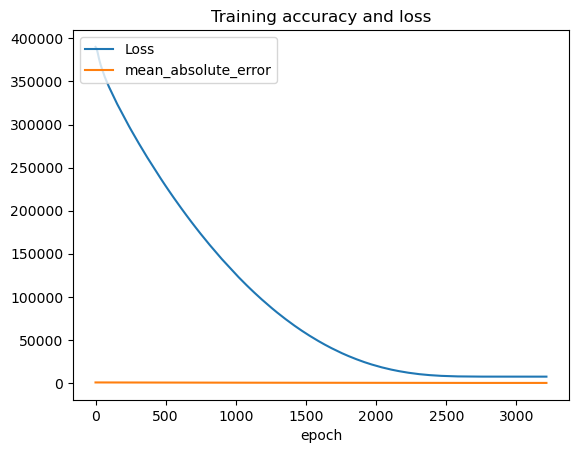

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.title('Training accuracy and loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'mean_absolute_error'], loc='upper left')
plt.show()